# Hackathon 2

## Import packages

In [1]:
pip install folium matplotlib mapclassify pysal geopandas

In [2]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from pysal.viz import mapclassify
import numpy as np
import mapclassify

## Data Loading and Exploration

In [3]:
#Load Leeds shape file
LeedsOA = gpd.read_file('LeedsOA.shp')
LeedsOA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      0 non-null      object  
 1   label     2543 non-null   object  
 2   code      2543 non-null   object  
 3   geometry  2543 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 79.6+ KB


<Axes: >

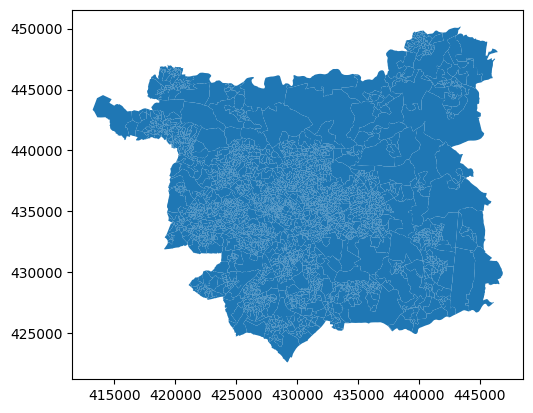

In [4]:
LeedsOA.plot()

In [5]:
#Load EPC Recommendations data
EPCrecom = pd.read_csv('EPCRecommendations.csv')
EPCrecom.head()

LMK_KEY  IMPROVEMENT_ITEM  \
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...                 1   
1  001dca82162cbdf798f746f53027c0cc82afda971d5e84...                 2   
2  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...                 1   
3  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...                 2   
4  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...                 3   

               IMPROVEMENT_SUMMARY_TEXT                IMPROVEMENT_DESCR_TEXT  \
0  Internal or external wall insulation  Internal or external wall insulation   
1   High heat retention storage heaters   High heat retention storage heaters   
2               Room-in-roof insulation               Room-in-roof insulation   
3  Internal or external wall insulation  Internal or external wall insulation   
4    Solar photovoltaic panels, 2.5 kWp             Solar photovoltaic panels   

   IMPROVEMENT_ID  IMPROVEMENT_ID_TEXT     INDICATIVE_COST  
0             7.0                  NaN  Â£4,000 - Â£14,000  
1            62.0                  NaN   Â£1,200 - Â£1,800  
2            46.0                  NaN   Â£1,500 - Â£2,700  
3             7.0                  NaN  Â£4,000 - Â£14,000  
4            34.0                  NaN   Â£3,500 - Â£5,500

In [6]:
#Load EPC Certificates data
EPCcertif = pd.read_csv('EPCertificates.csv')
EPCcertif.head()

<ipython-input-6-b5a33e0a2144>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  EPCcertif = pd.read_csv('EPCertificates.csv')


LMK_KEY  \
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...   
1  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...   
2  18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...   
3  18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...   
4                  275687798052018050310193492080467   

   BUILDING_REFERENCE_NUMBER CURRENT_ENERGY_RATING POTENTIAL_ENERGY_RATING  \
0                10003805692                     E                       C   
1                10003489215                     D                       B   
2                10003423919                     C                       B   
3                10002989904                     B                       A   
4                 4759821668                     D                       B   

   CURRENT_ENERGY_EFFICIENCY  POTENTIAL_ENERGY_EFFICIENCY PROPERTY_TYPE  \
0                         42                           70          Flat   
1                         61                           82         House   
2                         72                           86      Bungalow   
3                         88                           92      Bungalow   
4                         58                           87         House   

             BUILT_FORM  ENVIRONMENT_IMPACT_CURRENT  \
0  Enclosed End-Terrace                          41   
1           End-Terrace                          52   
2         Semi-Detached                          74   
3         Semi-Detached                          86   
4         Semi-Detached                          52   

   ENVIRONMENT_IMPACT_POTENTIAL  ...  PHOTO_SUPPLY  SOLAR_WATER_HEATING_FLAG  \
0                            51  ...           0.0                         N   
1                            77  ...           0.0                         N   
2                            88  ...           0.0                         N   
3                            92  ...          45.0                         N   
4                            87  ...           NaN                         N   

           MECHANICAL_VENTILATION                           ADDRESS  \
0                         natural  Flat 2, 35a Town Street, Farsley   
1                         natural                8 Sackville Street   
2  mechanical, supply and extract              20 Highfield Gardens   
3                         natural               17 Chestnut Gardens   
4                         natural               9, Foxwood Farm Way   

   CONSTITUENCY_LABEL           CONSTRUCTION_AGE_BAND            TENURE  \
0              Pudsey  England and Wales: before 1900  Rented (private)   
1    Leeds North East    England and Wales: 1900-1929  Rented (private)   
2          Leeds West    England and Wales: 2007-2011   Rented (social)   
3          Leeds West    England and Wales: 1983-1990    Owner-occupied   
4          Leeds East    England and Wales: 1983-1990    owner-occupied   

   FIXED_LIGHTING_OUTLETS_COUNT  LOW_ENERGY_FIXED_LIGHT_COUNT        UPRN  
0                           9.0                           NaN  72736113.0  
1                          12.0                           NaN  72658276.0  
2                           6.0                           NaN  72683080.0  
3                           7.0                           NaN  72266470.0  
4                           NaN                           NaN  72269527.0  

[5 rows x 78 columns]

In [7]:
#Load Leeds heat stress shape file
LeedsHeat = gpd.read_file('leeds_heat_stress.shp')
LeedsHeat.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 577306 entries, 0 to 577305
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id          577306 non-null  int64   
 1   mic_id      577306 non-null  object  
 2   heat_stres  577306 non-null  object  
 3   heat_str_1  577306 non-null  int64   
 4   geometry    577306 non-null  geometry
dtypes: geometry(1), int64(2), object(2)
memory usage: 22.0+ MB


In [8]:
#Load previously tidied geometry data for EPCcertif df (see other notebook for data wrangling)
EPCpointsgeom = gpd.read_file('epcgdf.shp')
EPCpointsgeom.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 391007 entries, 0 to 391006
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   LMK_KEY     391007 non-null  object  
 1   UPRN        391007 non-null  float64 
 2   X_COORDINA  391007 non-null  float64 
 3   Y_COORDINA  391007 non-null  float64 
 4   heat_stres  391007 non-null  object  
 5   heat_str_1  391007 non-null  int64   
 6   geometry    391007 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(2)
memory usage: 20.9+ MB


In [9]:
LeedsHeat.head()

id           mic_id heat_stres  heat_str_1  \
0  70005098  8b19421b0b60fff     Medium           3   
1  70010647  8b19421b0b74fff       High           4   
2  70014106  8b19421b0b1dfff     Medium           3   
3  70081954  8b19421b0a09fff     Medium           3   
4  70085154  8b19421b0a6afff     Medium           3   

                                            geometry  
0  POLYGON ((426060.276 429590.977, 426085.604 42...  
1  POLYGON ((425954.063 429665.147, 425979.39 429...  
2  POLYGON ((425740.816 429688.811, 425766.144 42...  
3  POLYGON ((425738.365 429314.77, 425763.694 429...  
4  POLYGON ((425950.799 429166.428, 425976.128 42...

In [10]:
EPCcertif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398288 entries, 0 to 398287
Data columns (total 78 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LMK_KEY                        398288 non-null  object 
 1   BUILDING_REFERENCE_NUMBER      398288 non-null  int64  
 2   CURRENT_ENERGY_RATING          398288 non-null  object 
 3   POTENTIAL_ENERGY_RATING        398288 non-null  object 
 4   CURRENT_ENERGY_EFFICIENCY      398288 non-null  int64  
 5   POTENTIAL_ENERGY_EFFICIENCY    398288 non-null  int64  
 6   PROPERTY_TYPE                  398288 non-null  object 
 7   BUILT_FORM                     398266 non-null  object 
 8   ENVIRONMENT_IMPACT_CURRENT     398288 non-null  int64  
 9   ENVIRONMENT_IMPACT_POTENTIAL   398288 non-null  int64  
 10  ENERGY_CONSUMPTION_CURRENT     398288 non-null  int64  
 11  ENERGY_CONSUMPTION_POTENTIAL   398048 non-null  float64
 12  CO2_EMISSIONS_CURRENT         

##Getting Geometries of properties

Adding geometries has been done offline, because Colab is not able to process the original Ordnance Survey UPRN file of 41 million rows. This EPCpointsgeom data will now be merged with the EPCcertif dataframe to create a new geodataframe.

In [11]:
EPCpointsgeom.head()

LMK_KEY        UPRN  X_COORDINA  \
0  0000b486ddda425b4d8c33668a9499b5a27cca3c7a08ca...  72069853.0   430330.00   
1  0001331d312e3ab63714ea269330964f70018dd7f3571e...  72335983.0   441176.00   
2  0001f383c9d70902f50108daaf9f2458a46fd363073ca3...  72198838.0   427417.00   
3  00033c59c4e8c305c971738039b4f2302b59ae24d0566a...  72786266.0   427143.84   
4  00042bd1b71897ae86aac315abf036e5cd00929db9af31...  72252451.0   431657.00   

   Y_COORDINA heat_stres  heat_str_1                       geometry  
0   438708.00     Medium           3  POINT (430330.007 438708.001)  
1   448653.00     Medium           3  POINT (441176.013 448653.009)  
2   435381.00       High           4  POINT (427417.015 435381.004)  
3   430379.13       High           4  POINT (427143.855 430379.134)  
4   431427.00       High           4  POINT (431657.012 431427.003)

In [12]:
#dropping UPRN row from EPCpointsgeom so it's not duplicated in join
EPCpointsgeom = EPCpointsgeom.drop(columns='UPRN')

In [13]:
#merging geometry shp to main dataframe
EPCcertif = EPCcertif.merge(EPCpointsgeom, on='LMK_KEY', how='left')

In [14]:
EPCcertif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398288 entries, 0 to 398287
Data columns (total 83 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   LMK_KEY                        398288 non-null  object  
 1   BUILDING_REFERENCE_NUMBER      398288 non-null  int64   
 2   CURRENT_ENERGY_RATING          398288 non-null  object  
 3   POTENTIAL_ENERGY_RATING        398288 non-null  object  
 4   CURRENT_ENERGY_EFFICIENCY      398288 non-null  int64   
 5   POTENTIAL_ENERGY_EFFICIENCY    398288 non-null  int64   
 6   PROPERTY_TYPE                  398288 non-null  object  
 7   BUILT_FORM                     398266 non-null  object  
 8   ENVIRONMENT_IMPACT_CURRENT     398288 non-null  int64   
 9   ENVIRONMENT_IMPACT_POTENTIAL   398288 non-null  int64   
 10  ENERGY_CONSUMPTION_CURRENT     398288 non-null  int64   
 11  ENERGY_CONSUMPTION_POTENTIAL   398048 non-null  float64 
 12  CO2_EMISSIONS_CU

In [15]:
#converting dataframe into geodataframe
EPCcertif = gpd.GeoDataFrame(
    EPCcertif, geometry='geometry', crs='27700')

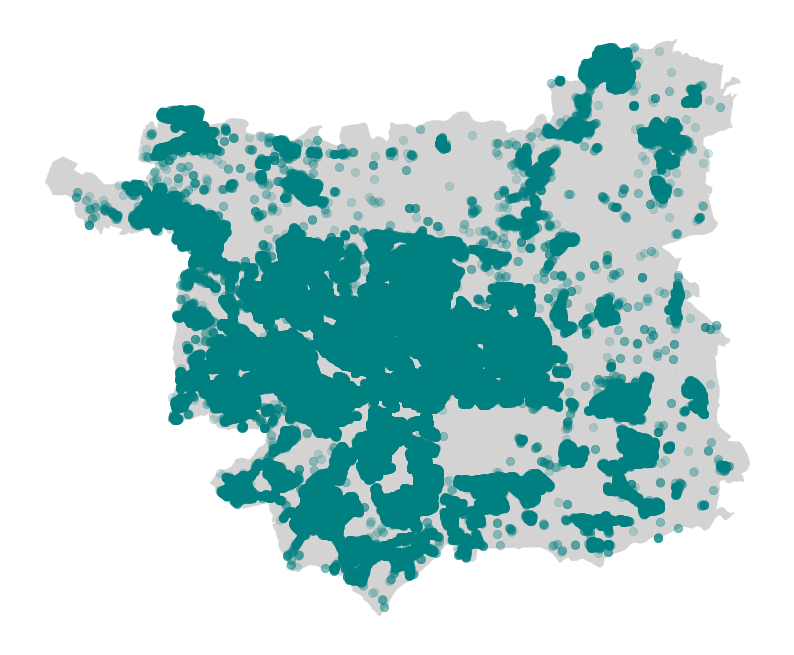

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
LeedsOA.plot(ax = ax, facecolor = 'lightgray', edgecolor = 'lightgray', linewidth = 0.2)
EPCcertif.plot(ax = ax, color = '#008080', linewidth = 0.5, alpha = 0.2)
ax.set_axis_off()
plt.show()

## Mapping heat stress

In [17]:
LeedsHeat['heat_stres'].unique()

array(['Medium', 'High', 'Low', 'Very High', 'Very Low'], dtype=object)

<ipython-input-18-d91abc46f0b1>:13: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  LeedsHeat.plot(ax=ax, column='heat_stres',


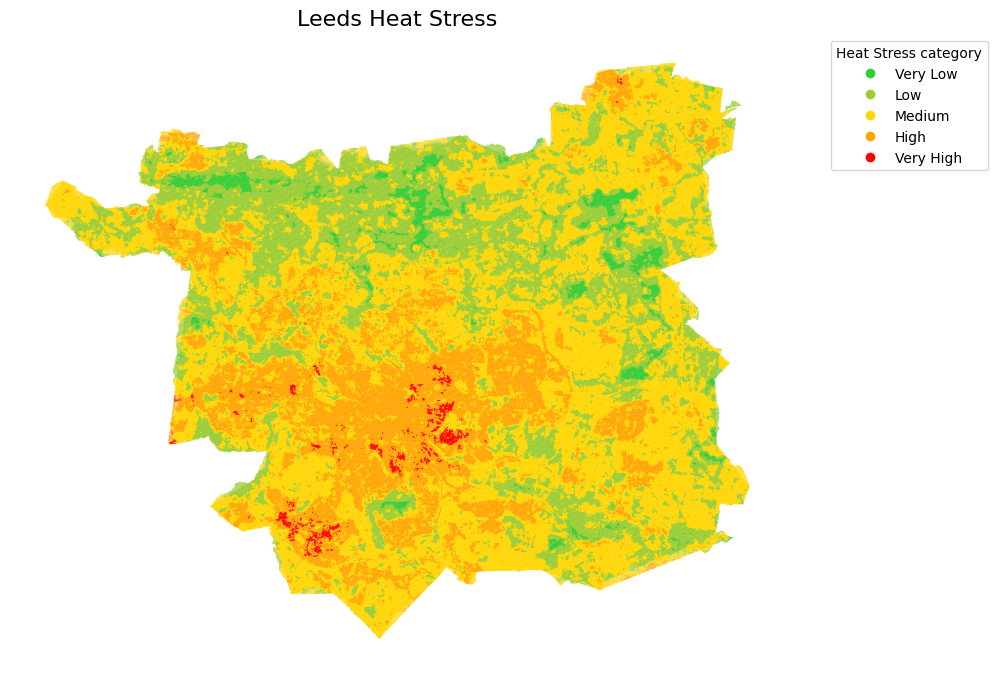

In [18]:
from matplotlib.lines import Line2D  # for legend handle

#Assign colors to each heat stress type
heat_stress_colors = {
    'Very Low': 'limegreen',
    'Low': 'yellowgreen',
    'Medium': 'gold',
    'High': 'orange',
    'Very High': 'red'}

#Plot Leeds map with colors based in the heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsHeat.plot(ax=ax, column='heat_stres',
               color=LeedsHeat['heat_stres'].map(heat_stress_colors),
               legend=True)
ax.set_title('Leeds Heat Stress', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Heat Stress category', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Data Cleaning

Keep only the columns we will be using for the matrix.

In [19]:
#Create new dataset keeping only the variables used in our matrix
Matrix = EPCcertif[['PROPERTY_TYPE', 'BUILT_FORM', 'TOTAL_FLOOR_AREA', 'FLAT_TOP_STOREY',
                   'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE', 'NUMBER_OPEN_FIREPLACES',
                   'FLOOR_DESCRIPTION', 'WALLS_DESCRIPTION', 'ROOF_DESCRIPTION',
                    'CONSTRUCTION_AGE_BAND', 'UPRN', 'geometry', 'heat_stres', 'heat_str_1', 'LMK_KEY']]
#Add index column at the beginning
Matrix.insert(0, 'Index', range(1, len(Matrix) + 1))
#Check
Matrix.head()

Index PROPERTY_TYPE            BUILT_FORM  TOTAL_FLOOR_AREA  \
0      1          Flat  Enclosed End-Terrace              65.0   
1      2         House           End-Terrace             140.0   
2      3      Bungalow         Semi-Detached              58.0   
3      4      Bungalow         Semi-Detached              49.0   
4      5         House         Semi-Detached              62.0   

  FLAT_TOP_STOREY  MULTI_GLAZE_PROPORTION  \
0               N                   100.0   
1             NaN                   100.0   
2             NaN                   100.0   
3             NaN                   100.0   
4             NaN                   100.0   

                                     GLAZED_TYPE  NUMBER_OPEN_FIREPLACES  \
0           double glazing installed before 2002                     0.0   
1           double glazing, unknown install date                     0.0   
2  double glazing installed during or after 2002                     0.0   
3           double glazing, unknown install date                     0.0   
4  double glazing installed during or after 2002                     0.0   

                    FLOOR_DESCRIPTION  \
0              (other premises below)   
1      Solid, no insulation (assumed)   
2      Suspended, insulated (assumed)   
3  Suspended, no insulation (assumed)   
4  Suspended, no insulation (assumed)   

                                   WALLS_DESCRIPTION  \
0  Sandstone or limestone, as built, no insulatio...   
1     Solid brick, as built, no insulation (assumed)   
2         Cavity wall, as built, insulated (assumed)   
3                         Cavity wall, filled cavity   
4         Cavity wall, as built, insulated (assumed)   

                   ROOF_DESCRIPTION           CONSTRUCTION_AGE_BAND  \
0          (another dwelling above)  England and Wales: before 1900   
1  Pitched, no insulation (assumed)    England and Wales: 1900-1929   
2   Pitched, 350 mm loft insulation    England and Wales: 2007-2011   
3   Pitched, 200 mm loft insulation    England and Wales: 1983-1990   
4   Pitched, 100 mm loft insulation    England and Wales: 1983-1990   

         UPRN                       geometry heat_stres  heat_str_1  \
0  72736113.0   POINT (421724.58 435187.593)       High         4.0   
1  72658276.0       POINT (430374.01 435008)       High         4.0   
2  72683080.0  POINT (427427.012 432501.008)       High         4.0   
3  72266470.0  POINT (427072.017 432713.007)       High         4.0   
4  72269527.0  POINT (434242.012 436068.999)     Medium         3.0   

                                             LMK_KEY  
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...  
1  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...  
2  18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...  
3  18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...  
4                  275687798052018050310193492080467

In [20]:
#checking Matrix is still a geodataframe
Matrix.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 398288 entries, 0 to 398287
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Index                   398288 non-null  int64   
 1   PROPERTY_TYPE           398288 non-null  object  
 2   BUILT_FORM              398266 non-null  object  
 3   TOTAL_FLOOR_AREA        398288 non-null  float64 
 4   FLAT_TOP_STOREY         121680 non-null  object  
 5   MULTI_GLAZE_PROPORTION  369311 non-null  float64 
 6   GLAZED_TYPE             378470 non-null  object  
 7   NUMBER_OPEN_FIREPLACES  392142 non-null  float64 
 8   FLOOR_DESCRIPTION       398263 non-null  object  
 9   WALLS_DESCRIPTION       398286 non-null  object  
 10  ROOF_DESCRIPTION        398089 non-null  object  
 11  CONSTRUCTION_AGE_BAND   394637 non-null  object  
 12  UPRN                    392064 non-null  float64 
 13  geometry                391007 non-null  geometry
 

##Scoring **roof** heat stress

In [21]:
#Need to delete lines with no information of roof insulation (no U values or no insulation thickness)

#Get index of rows where 'ROOF_DESCRIPTION' needs to be deleted
rows_drop = Matrix[Matrix['ROOF_DESCRIPTION'].isin([
'Flat',
'Flat,',
'Pitched',
'Pitched,',
'Pitched, *** INVALID INPUT Code : 57 *** loft insulation',
'Pitched, Unknown loft insulation',
'Roof room(s),'
'Roof room(s), thatched',
'SAP05:Roof',
'Thatched'])].index

#Drop the rows
Matrix = Matrix.drop(rows_drop)
#Check dataset
Matrix['ROOF_DESCRIPTION'].unique()

array(['(another dwelling above)', 'Pitched, no insulation (assumed)',
       'Pitched, 350 mm loft insulation',
       'Pitched, 200 mm loft insulation',
       'Pitched, 100 mm loft insulation',
       'Pitched, 250 mm loft insulation', '(other premises above)',
       'Pitched, 300+ mm loft insulation', 'Pitched, insulated (assumed)',
       'Roof room(s), no insulation (assumed)',
       'Pitched, 100mm loft insulation', 'Pitched, 75 mm loft insulation',
       'Pitched, >=300 mm loft insulation',
       'Pitched, 270 mm loft insulation',
       'Pitched, 150 mm loft insulation',
       'Pitched, 25 mm loft insulation', 'Pitched, insulated',
       'Roof room(s), insulated (assumed)',
       'Roof room(s), ceiling insulated',
       'Pitched, 300 mm loft insulation', 'Flat, no insulation (assumed)',
       'Pitched, 50mm loft insulation',
       'Average thermal transmittance 0.10 W/m-Â¦K',
       'Average thermal transmittance = 0.13 W/m?K',
       'Average thermal transmittance 0

We create a new column to score the roof insulation. To do this we categorize the roof descriptions into the following categories and assign them a score:
* Very good = 20%
* Good = 40%
* Medium = 60%
* Poor = 80%
* Very Poor = 100%

The higher the score the more heat stress.

In [22]:
#Create function to assign a roof heat stress score based on roof description

def assign_roof_score(roof_description):

  #assign 0.2 (Very good) score to all these roof descriptions
    if roof_description in [
'Average thermal transmittance = 0.01 W/m?K',
'Average thermal transmittance = 0.04 W/m?K',
'Average thermal transmittance = 0.06 W/m?K',
'Average thermal transmittance = 0.10 W/m?K',
'Average thermal transmittance 0 W/m?K',
'Average thermal transmittance 0.00 W/m&#0178;K',
'Average thermal transmittance 0.00 W/m?K',
'Average thermal transmittance 0.01 W/m?K',
'Average thermal transmittance 0.02 W/m?K',
'Average thermal transmittance 0.04 W/m?K',
'Average thermal transmittance 0.05 W/m?K',
'Average thermal transmittance 0.05 W/m-Â¦K',
'Average thermal transmittance 0.06 W/m-Â¦K',
'Average thermal transmittance 0.07 W/m-Â¦K',
'Average thermal transmittance 0.08 W/m?K',
'Average thermal transmittance 0.08 W/m-Â¦K',
'Average thermal transmittance 0.09 W/m&#0178;K',
'Average thermal transmittance 0.09 W/m??K|Trawsyriannedd thermol cyfartalog 0.09 W/m??K',
'Average thermal transmittance 0.09 W/m?K',
'Average thermal transmittance 0.09 W/m-Â¦K',
'Average thermal transmittance 0.1 W/m?K',
'Average thermal transmittance 0.1 W/m-Â¦K',
'Average thermal transmittance 0.10 W/m??K',
'Average thermal transmittance 0.10 W/m?K',
'Average thermal transmittance 0.10 W/m+Ã©-Â¦K',
'Average thermal transmittance 0.10 W/mA?K',
'Average thermal transmittance 0.10 W/m-Â¦K',
'Pitched, 350 mm loft insulation',
'Pitched, 400 mm loft insulation',
'Pitched, 400+  mm loft insulation',
'Pitched, 400+ mm loft insulation'
]:
        return 0.2

#assign 0.4 (Good) score to all these roof descriptions
    elif roof_description in [
'Average thermal transmittance = 0.12 W/m?K',
'Average thermal transmittance = 0.13 W/m?K',
'Average thermal transmittance = 0.14 W/m?K',
'Average thermal transmittance = 0.15 W/m?K',
'Average thermal transmittance = 0.16 W/m?K',
'Average thermal transmittance 0.11 W/m??K',
'Average thermal transmittance 0.11 W/m??K|Trawsyriannedd thermol cyfartalog 0.11 W/m??K',
'Average thermal transmittance 0.11 W/m?K',
'Average thermal transmittance 0.11 W/m+Ã©-Â¦K',
'Average thermal transmittance 0.11 W/m-Â¦K',
'Average thermal transmittance 0.12 W/m&#0178;K',
'Average thermal transmittance 0.12 W/m??K',
'Average thermal transmittance 0.12 W/m??K|Trawsyriannedd thermol cyfartalog 0.12 W/m??K',
'Average thermal transmittance 0.12 W/m?K',
'Average thermal transmittance 0.12 W/m+Ã©-Â¦K',
'Average thermal transmittance 0.12 W/m2K',
'Average thermal transmittance 0.12 W/m-Â¦K',
'Average thermal transmittance 0.13 W/m&#0178;K',
'Average thermal transmittance 0.13 W/m??K',
'Average thermal transmittance 0.13 W/m??K|Trawsyriannedd thermol cyfartalog 0.13 W/m??K',
'Average thermal transmittance 0.13 W/m?K',
'Average thermal transmittance 0.13 W/m2K',
'Average thermal transmittance 0.13 W/m-Â¦K',
'Average thermal transmittance 0.130 W/m-Â¦K',
'Average thermal transmittance 0.14 W/m&#0178;K',
'Average thermal transmittance 0.14 W/m??K',
'Average thermal transmittance 0.14 W/m??K|Trawsyriannedd thermol cyfartalog 0.14 W/m??K',
'Average thermal transmittance 0.14 W/m?K',
'Average thermal transmittance 0.14 W/m?K|Trawsyriannedd thermol cyfartalog 0.14 W/m?K',
'Average thermal transmittance 0.14 W/m+Ã©-Â¦K',
'Average thermal transmittance 0.14 W/m2K',
'Average thermal transmittance 0.14 W/mA?K',
'Average thermal transmittance 0.14 W/m-Â¦K',
'Average thermal transmittance 0.146 W/m-Â¦K',
'Average thermal transmittance 0.15 W/m&#0178;K',
'Average thermal transmittance 0.15 W/m??K',
'Average thermal transmittance 0.15 W/m??K|Trawsyriannedd thermol cyfartalog 0.15 W/m??K',
'Average thermal transmittance 0.15 W/m?K',
'Average thermal transmittance 0.15 W/m+Ã©-Â¦K',
'Average thermal transmittance 0.15 W/m2K',
'Average thermal transmittance 0.15 W/mA?K',
'Average thermal transmittance 0.15 W/m-Â¦K',
'Average thermal transmittance 0.152 W/m-Â¦K',
'Average thermal transmittance 0.159 W/m-Â¦K',
'Average thermal transmittance 0.16 W/m&#0178;K',
'Average thermal transmittance 0.16 W/m??K',
'Average thermal transmittance 0.16 W/m??K|Trawsyriannedd thermol cyfartalog 0.16 W/m??K',
'Average thermal transmittance 0.16 W/m?K',
'Average thermal transmittance 0.16 W/m+Ã©-Â¦K',
'Average thermal transmittance 0.16 W/m2K',
'Average thermal transmittance 0.16 W/mA?K',
'Average thermal transmittance 0.16 W/m-Â¦K',
'Flat, insulated',
'Flat, insulated (assumed)',
'Pitched,  loft insulation',
'Pitched,  mm loft insulation',
'Pitched, >=300 mm loft insulation',
'Pitched, 250 mm loft insulation',
'Pitched, 250mm loft insulation',
'Pitched, 270 mm loft insulation',
'Pitched, 300 mm loft insulation',
'Pitched, 300+  mm loft insulation',
'Pitched, 300+ mm loft insulation',
'Pitched, 300+mm loft insulation',
'Pitched, 300mm loft insulation',
'Pitched, insulated',
'Pitched, insulated (assumed)',
'Pitched, insulated at rafters',
'Pitched, loft insulation',
'Pitched, mm loft insulation',
'Roof room(s), ceiling insulated',
'Roof room(s), insulated',
'Roof room(s), insulated (assumed)',
'Thatched, with additional insulation'
]:
        return 0.4

#assign 0.6 (Medium) score to all these roof descriptions
    elif roof_description in [
'(another dwelling above)',
'(other premises above)',
'(other premises above)|(eiddo arall uwchben)',
'Ar oleddf, 200 mm o inswleiddio yn y llofft',
'Average thermal transmittance = 0.17 W/m?K',
'Average thermal transmittance = 0.18 W/m?K',
'Average thermal transmittance = 0.19 W/m?K',
'Average thermal transmittance = 0.20 W/m?K',
'Average thermal transmittance 0.17 W/m&#0178;K',
'Average thermal transmittance 0.17 W/m??K',
'Average thermal transmittance 0.17 W/m??K|Trawsyriannedd thermol cyfartalog 0.17 W/m??K',
'Average thermal transmittance 0.17 W/m?K',
'Average thermal transmittance 0.17 W/m+Ã©-Â¦K',
'Average thermal transmittance 0.17 W/m2K',
'Average thermal transmittance 0.17 W/mA?K',
'Average thermal transmittance 0.17 W/m-Â¦K',
'Average thermal transmittance 0.18 W/m&#0178;K',
'Average thermal transmittance 0.18 W/m??K',
'Average thermal transmittance 0.18 W/m??K|Trawsyriannedd thermol cyfartalog 0.18 W/m??K',
'Average thermal transmittance 0.18 W/m?K',
'Average thermal transmittance 0.18 W/m+Ã©-Â¦K',
'Average thermal transmittance 0.18 W/m2K',
'Average thermal transmittance 0.18 W/m-Â¦K',
'Average thermal transmittance 0.19 W/m??K',
'Average thermal transmittance 0.19 W/m?K',
'Average thermal transmittance 0.19 W/m+Ã©-Â¦K',
'Average thermal transmittance 0.19 W/m2K',
'Average thermal transmittance 0.19 W/m-Â¦K',
'Average thermal transmittance 0.2 W/m?K',
'Average thermal transmittance 0.2 W/m-Â¦K',
'Average thermal transmittance 0.20 W/m&#0178;K',
'Average thermal transmittance 0.20 W/m??K|Trawsyriannedd thermol cyfartalog 0.20 W/m??K',
'Average thermal transmittance 0.20 W/m?K',
'Average thermal transmittance 0.20 W/m2K',
'Average thermal transmittance 0.20 W/m-Â¦K',
'Flat, limited insulation',
'Flat, limited insulation (assumed)',
'Other premises above',
'Pitched, 200 mm loft insulation',
'Pitched, 200mm loft insulation',
'Pitched, limited insulation',
'Pitched, limited insulation (assumed)',
'Roof room(s), limited insulation',
'Roof room(s), limited insulation (assumed)'
]:
        return 0.6

#assign 0.8 (Poor) score to all these these roof descriptions
    elif roof_description in [
'Average thermal transmittance = 0.21 W/m?K',
'Average thermal transmittance = 0.22 W/m?K',
'Average thermal transmittance = 0.23 W/m?K',
'Average thermal transmittance = 0.24 W/m?K',
'Average thermal transmittance = 0.25 W/m?K',
'Average thermal transmittance = 0.32 W/m?K',
'Average thermal transmittance 0.21 W/m&#0178;K',
'Average thermal transmittance 0.21 W/m??K',
'Average thermal transmittance 0.21 W/m?K',
'Average thermal transmittance 0.21 W/m-Â¦K',
'Average thermal transmittance 0.22 W/m&#0178;K',
'Average thermal transmittance 0.22 W/m??K|Trawsyriannedd thermol cyfartalog 0.22 W/m??K',
'Average thermal transmittance 0.22 W/m?K',
'Average thermal transmittance 0.22 W/m-Â¦K',
'Average thermal transmittance 0.23 W/m??K',
'Average thermal transmittance 0.23 W/m?K',
'Average thermal transmittance 0.23 W/m-Â¦K',
'Average thermal transmittance 0.24 W/m??K|Trawsyriannedd thermol cyfartalog 0.24 W/m??K',
'Average thermal transmittance 0.24 W/m?K',
'Average thermal transmittance 0.24 W/m-Â¦K',
'Average thermal transmittance 0.25 W/m??K',
'Average thermal transmittance 0.25 W/m?K',
'Average thermal transmittance 0.25 W/m-Â¦K',
'Average thermal transmittance 0.26 W/m?K',
'Average thermal transmittance 0.26 W/m-Â¦K',
'Average thermal transmittance 0.27 W/m?K',
'Average thermal transmittance 0.27 W/m-Â¦K',
'Average thermal transmittance 0.28 W/m?K',
'Average thermal transmittance 0.28 W/m-Â¦K',
'Average thermal transmittance 0.29 W/m?K',
'Average thermal transmittance 0.29 W/m-Â¦K',
'Average thermal transmittance 0.3 W/m-Â¦K',
'Average thermal transmittance 0.30 W/m?K',
'Average thermal transmittance 0.30 W/m-Â¦K',
'Average thermal transmittance 0.31 W/m?K',
'Average thermal transmittance 0.31 W/m-Â¦K',
'Average thermal transmittance 0.32 W/m?K',
'Average thermal transmittance 0.32 W/m-Â¦K',
'Average thermal transmittance 0.33 W/m?K',
'Average thermal transmittance 0.33 W/m-Â¦K',
'Average thermal transmittance 0.34 W/m?K',
'Average thermal transmittance 0.34 W/m-Â¦K',
'Average thermal transmittance 0.35 W/m?K',
'Average thermal transmittance 0.35 W/m-Â¦K',
'Average thermal transmittance 0.36 W/m-Â¦K',
'Average thermal transmittance 0.37 W/m-Â¦K',
'Average thermal transmittance 0.38 W/m-Â¦K',
'Average thermal transmittance 0.4 W/m-Â¦K',
'Average thermal transmittance 0.40 W/m-Â¦K',
'Average thermal transmittance 0.41 W/m-Â¦K',
'Average thermal transmittance 0.43 W/m-Â¦K',
'Average thermal transmittance 0.44 W/m-Â¦K',
'Average thermal transmittance 0.45 W/m-Â¦K',
'Pitched, 100 mm loft insulation',
'Pitched, 100mm loft insulation',
'Pitched, 150 mm loft insulation',
'Pitched, 150mm loft insulation'
]:
        return 0.8

#assign 1 (Very Poor) score to all these roof descriptions
    elif roof_description in [
'Ar oleddf, 25 mm o inswleiddio yn y llofft',
'Ar oleddf, 50 mm o inswleiddio yn y llofft',
'Ar oleddf, dim inswleiddio (rhagdybiaeth)',
'Average thermal transmittance 0.51 W/m-Â¦K',
'Average thermal transmittance 0.52 W/m-Â¦K',
'Average thermal transmittance 0.58 W/m-Â¦K',
'Average thermal transmittance 0.62 W/m-Â¦K',
'Average thermal transmittance 0.65 W/m-Â¦K',
'Average thermal transmittance 0.68 W/m-Â¦K',
'Average thermal transmittance 0.90 W/m-Â¦K',
'Average thermal transmittance 1.07 W/m-Â¦K',
'Average thermal transmittance 1.13 W/m-Â¦K',
'Average thermal transmittance 1.16 W/m-Â¦K',
'Average thermal transmittance 1.2 W/m-Â¦K',
'Average thermal transmittance 1.20 W/m-Â¦K',
'Average thermal transmittance 1.5 W/m-Â¦K',
'Average thermal transmittance 1.52 W/m-Â¦K',
'Average thermal transmittance 1.60 W/m-Â¦K',
'Average thermal transmittance 2.3 W/m-Â¦K',
'Average thermal transmittance 2.30 W/m?K',
'Average thermal transmittance 2.30 W/m-Â¦K',
'Average thermal transmittance 5.01 W/m-Â¦K',
'Flat, no insulation',
'Flat, no insulation (assumed)',
'Pitched, 0 mm loft insulation',
'Pitched, 0mm loft insulation',
'Pitched, 1 mm loft insulation',
'Pitched, 12 mm loft insulation',
'Pitched, 12mm loft insulation',
'Pitched, 25 mm loft insulation',
'Pitched, 25mm loft insulation',
'Pitched, 50 mm loft insulation',
'Pitched, 50mm loft insulation',
'Pitched, 75 mm loft insulation'
]:
        return 1

    else:
        return 1  #Default for unknown roof descriptions

#Apply function to create new column with roof heat stress score based on roof description
Matrix['Roof_Score'] = Matrix['ROOF_DESCRIPTION'].apply(assign_roof_score)

#Check
Matrix.head()

Index PROPERTY_TYPE            BUILT_FORM  TOTAL_FLOOR_AREA  \
0      1          Flat  Enclosed End-Terrace              65.0   
1      2         House           End-Terrace             140.0   
2      3      Bungalow         Semi-Detached              58.0   
3      4      Bungalow         Semi-Detached              49.0   
4      5         House         Semi-Detached              62.0   

  FLAT_TOP_STOREY  MULTI_GLAZE_PROPORTION  \
0               N                   100.0   
1             NaN                   100.0   
2             NaN                   100.0   
3             NaN                   100.0   
4             NaN                   100.0   

                                     GLAZED_TYPE  NUMBER_OPEN_FIREPLACES  \
0           double glazing installed before 2002                     0.0   
1           double glazing, unknown install date                     0.0   
2  double glazing installed during or after 2002                     0.0   
3           double glazing, unknown install date                     0.0   
4  double glazing installed during or after 2002                     0.0   

                    FLOOR_DESCRIPTION  \
0              (other premises below)   
1      Solid, no insulation (assumed)   
2      Suspended, insulated (assumed)   
3  Suspended, no insulation (assumed)   
4  Suspended, no insulation (assumed)   

                                   WALLS_DESCRIPTION  \
0  Sandstone or limestone, as built, no insulatio...   
1     Solid brick, as built, no insulation (assumed)   
2         Cavity wall, as built, insulated (assumed)   
3                         Cavity wall, filled cavity   
4         Cavity wall, as built, insulated (assumed)   

                   ROOF_DESCRIPTION           CONSTRUCTION_AGE_BAND  \
0          (another dwelling above)  England and Wales: before 1900   
1  Pitched, no insulation (assumed)    England and Wales: 1900-1929   
2   Pitched, 350 mm loft insulation    England and Wales: 2007-2011   
3   Pitched, 200 mm loft insulation    England and Wales: 1983-1990   
4   Pitched, 100 mm loft insulation    England and Wales: 1983-1990   

         UPRN                       geometry heat_stres  heat_str_1  \
0  72736113.0   POINT (421724.58 435187.593)       High         4.0   
1  72658276.0       POINT (430374.01 435008)       High         4.0   
2  72683080.0  POINT (427427.012 432501.008)       High         4.0   
3  72266470.0  POINT (427072.017 432713.007)       High         4.0   
4  72269527.0  POINT (434242.012 436068.999)     Medium         3.0   

                                             LMK_KEY  Roof_Score  
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...         0.6  
1  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...         1.0  
2  18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...         0.2  
3  18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...         0.6  
4                  275687798052018050310193492080467         0.8

<ipython-input-23-96bc975c9e04>:15: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix.plot(ax=ax, column='Roof_Score',


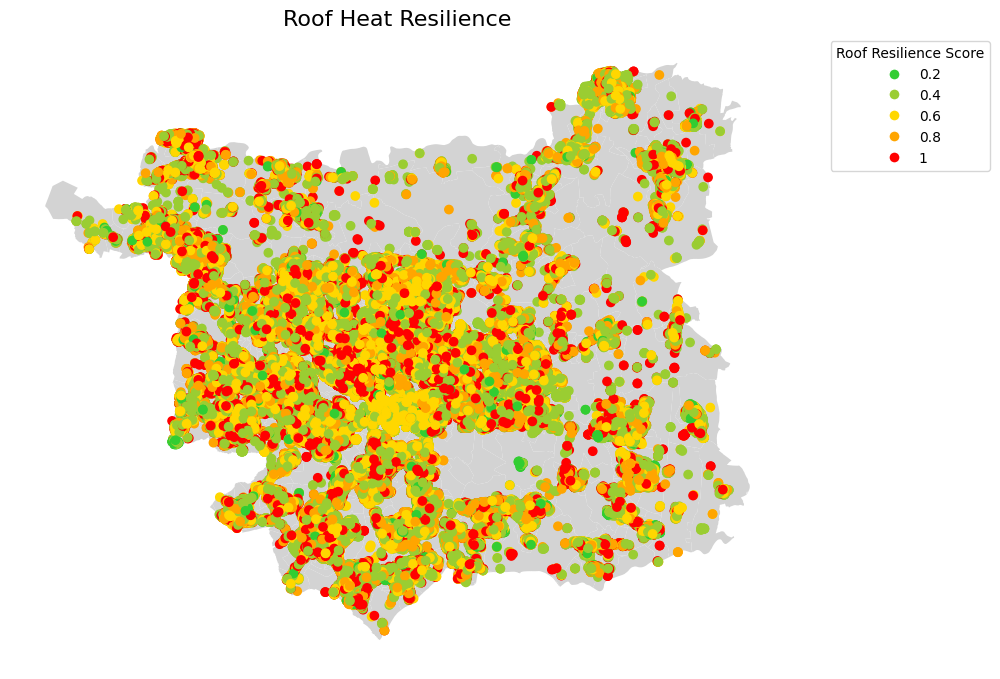

In [23]:
from matplotlib.lines import Line2D  #for legend handle

#Plot Roof Heat Stress scores
#Assign colors to each roof heat stress type
heat_stress_colors = {
    0.2 : 'limegreen',
    0.4 : 'yellowgreen',
    0.6 : 'gold',
    0.8 : 'orange',
    1 : 'red'}

#Plot Leeds map with colors based in the roof heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')
Matrix.plot(ax=ax, column='Roof_Score',
               color=Matrix['Roof_Score'].map(heat_stress_colors),
               legend=True)

ax.set_title('Roof Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Roof Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Scoring **Property Type, Built Form and Total floor area** heat stress

In [24]:
Matrix['TOTAL_FLOOR_AREA'].describe()

count    397721.000000
mean         81.112538
std          48.545084
min           0.000000
25%          58.000000
50%          73.000000
75%          92.000000
max        5918.000000
Name: TOTAL_FLOOR_AREA, dtype: float64

In [25]:
Matrix['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
House         252867
Flat          120955
Bungalow       18832
Maisonette      5052
Park home         15
Name: count, dtype: int64

In [26]:
Matrix = Matrix[Matrix["BUILT_FORM"] != "NO DATA!"]

In [27]:
Matrix['BUILT_FORM'].value_counts()

BUILT_FORM
Semi-Detached           135409
Mid-Terrace              96660
Detached                 63055
End-Terrace              49856
Enclosed Mid-Terrace     28538
Enclosed End-Terrace     17283
Name: count, dtype: int64

In [28]:
Matrix['FLAT_TOP_STOREY'].value_counts()

FLAT_TOP_STOREY
N    81026
Y    36701
Name: count, dtype: int64

In [29]:
Matrix['TOTAL_FLOOR_AREA'].describe()

count    390823.000000
mean         81.473926
std          48.708089
min           0.000000
25%          58.000000
50%          73.000000
75%          92.800000
max        5918.000000
Name: TOTAL_FLOOR_AREA, dtype: float64

In [30]:
property_type_weights = {"House": 0.6,"Flat": 0.9, "Bungalow": 0.5,"Maisonette": 0.4,"Park home": 0.1,}

In [31]:
built_form_weights = {"Semi-detached": 0.6,"Mid-Terrace": 0.8, "Detached": 0.2,"End-Terrace": 0.3,"Enclosed Mid-Terrace": 0.7,"Enclosed End-Terrace": 0.4,}

In [32]:
flat_top_storey_weights = {"N": 0.1,"Y": 0.9,}

In [33]:
def assign_floor_area_weight(floor_area, percentile_25, percentile_50, percentile_75):
   if floor_area >= percentile_75:
    return 0.4
   elif floor_area >= percentile_50:
    return 0.6
   elif floor_area >= percentile_25:
    return 0.8
   else:
    return 1

In [34]:
def apply_individual_weights(certificates):
    required_cols = ["PROPERTY_TYPE", "BUILT_FORM", "FLAT_TOP_STOREY", "TOTAL_FLOOR_AREA"]
    percentile_25 = certificates["TOTAL_FLOOR_AREA"].quantile(0.25)
    percentile_50 = certificates["TOTAL_FLOOR_AREA"].quantile(0.50)
    percentile_75 = certificates["TOTAL_FLOOR_AREA"].quantile(0.75)
    certificates["PROPERTY_TYPE_WEIGHT"] = certificates["PROPERTY_TYPE"].map(property_type_weights)
    certificates["BUILT_FORM_WEIGHT"] = certificates["BUILT_FORM"].map(built_form_weights)
    certificates["FLAT_TOP_STOREY_WEIGHT"] = certificates["FLAT_TOP_STOREY"].map(flat_top_storey_weights)
    certificates["TOTAL_FLOOR_AREA_WEIGHT"] = certificates["TOTAL_FLOOR_AREA"].apply(
        lambda x: assign_floor_area_weight(x, percentile_25, percentile_50, percentile_75))

    return certificates

In [35]:
Matrix = apply_individual_weights(Matrix)

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [36]:
Matrix

Index PROPERTY_TYPE            BUILT_FORM  TOTAL_FLOOR_AREA  \
0            1          Flat  Enclosed End-Terrace              65.0   
1            2         House           End-Terrace             140.0   
2            3      Bungalow         Semi-Detached              58.0   
3            4      Bungalow         Semi-Detached              49.0   
4            5         House         Semi-Detached              62.0   
...        ...           ...                   ...               ...   
398283  398284         House           Mid-Terrace              75.0   
398284  398285         House  Enclosed Mid-Terrace              71.0   
398285  398286         House           Mid-Terrace              66.0   
398286  398287    Maisonette         Semi-Detached             121.0   
398287  398288    Maisonette           Mid-Terrace             120.0   

       FLAT_TOP_STOREY  MULTI_GLAZE_PROPORTION  \
0                    N                   100.0   
1                  NaN                   100.0   
2                  NaN                   100.0   
3                  NaN                   100.0   
4                  NaN                   100.0   
...                ...                     ...   
398283             NaN                   100.0   
398284             NaN                   100.0   
398285             NaN                   100.0   
398286               N                     0.0   
398287               N                   100.0   

                                          GLAZED_TYPE  NUMBER_OPEN_FIREPLACES  \
0                double glazing installed before 2002                     0.0   
1                double glazing, unknown install date                     0.0   
2       double glazing installed during or after 2002                     0.0   
3                double glazing, unknown install date                     0.0   
4       double glazing installed during or after 2002                     0.0   
...                                               ...                     ...   
398283                                    not defined                     1.0   
398284           double glazing, unknown install date                     0.0   
398285           double glazing, unknown install date                     0.0   
398286                                            NaN                     0.0   
398287           double glazing, unknown install date                     0.0   

                                 FLOOR_DESCRIPTION  \
0                           (other premises below)   
1                   Solid, no insulation (assumed)   
2                   Suspended, insulated (assumed)   
3               Suspended, no insulation (assumed)   
4               Suspended, no insulation (assumed)   
...                                            ...   
398283          Suspended, no insulation (assumed)   
398284  To unheated space, no insulation (assumed)   
398285  To unheated space, no insulation (assumed)   
398286                      (other premises below)   
398287              Solid, no insulation (assumed)   

                                        WALLS_DESCRIPTION  ...        UPRN  \
0       Sandstone or limestone, as built, no insulatio...  ...  72736113.0   
1          Solid brick, as built, no insulation (assumed)  ...  72658276.0   
2              Cavity wall, as built, insulated (assumed)  ...  72683080.0   
3                              Cavity wall, filled cavity  ...  72266470.0   
4              Cavity wall, as built, insulated (assumed)  ...  72269527.0   
...                                                   ...  ...         ...   
398283     Solid brick, as built, no insulation (assumed)  ...  72062906.0   
398284     Solid brick, as built, no insulation (assumed)  ...  72145620.0   
398285     Solid brick, as built, no insulation (assumed)  ...  72123738.0   
398286         Average thermal transmittance 0.28 W/m-Â¦K  ...         NaN   
398287  Sandstone or limestone, as built, no insulatio...  ... 

Map the different scores

<ipython-input-37-353134c30b80>:16: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix.plot(ax=ax, column='PROPERTY_TYPE_WEIGHT',


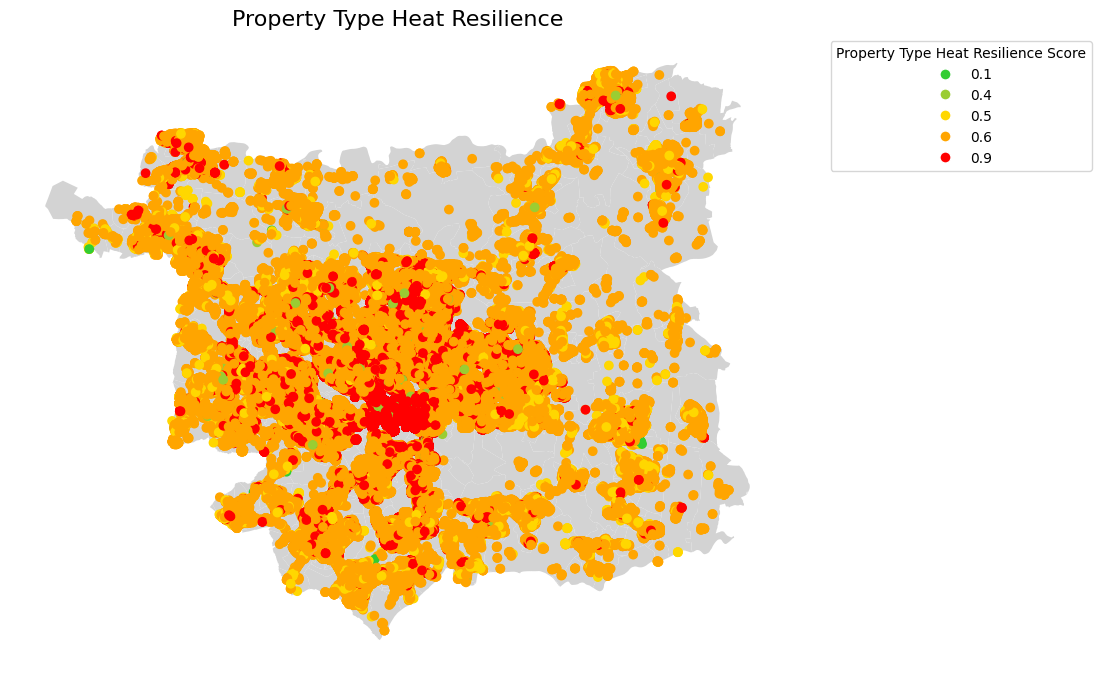

In [37]:
#Map Property Type Heat Susceptibility

from matplotlib.lines import Line2D  #for legend handle

#Assign colors to each Property heat stress type
heat_stress_colors = {
    0.1 : 'limegreen',
    0.4 : 'yellowgreen',
    0.5 : 'gold',
    0.6 : 'orange',
    0.9 : 'red'}

#Plot Leeds map with colors based in the Property heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')
Matrix.plot(ax=ax, column='PROPERTY_TYPE_WEIGHT',
               color=Matrix['PROPERTY_TYPE_WEIGHT'].map(heat_stress_colors),
               legend=True)

ax.set_title('Property Type Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Property Type Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-38-926a56582930>:21: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix_clean.plot(ax=ax, column='BUILT_FORM_WEIGHT',


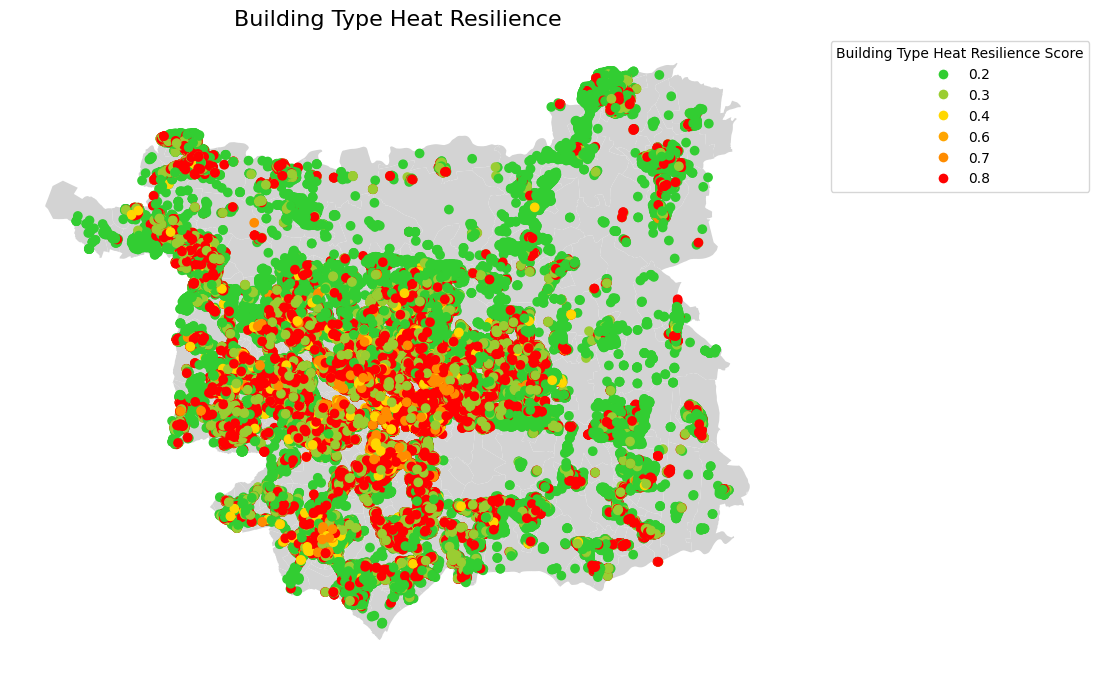

In [38]:
#Map Built Form Heat Susceptibility

from matplotlib.lines import Line2D  #for legend handle

#Assign colors to each Property heat stress type
heat_stress_colors = {
    0.2 : 'limegreen',
    0.3 : 'yellowgreen',
    0.4 : 'gold',
    0.6 : 'orange',
    0.7 : 'darkorange',
    0.8 : 'red'}

#Plot Leeds map with colors based in the Property heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')


#Remove NAs in column before plotting
Matrix_clean = Matrix.dropna(subset=['BUILT_FORM_WEIGHT'])
Matrix_clean.plot(ax=ax, column='BUILT_FORM_WEIGHT',
               color=Matrix_clean['BUILT_FORM_WEIGHT'].map(heat_stress_colors),
               legend=True)

ax.set_title('Building Type Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Building Type Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-39-ca397df6e8f4>:17: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix_clean.plot(ax=ax, column='FLAT_TOP_STOREY_WEIGHT',


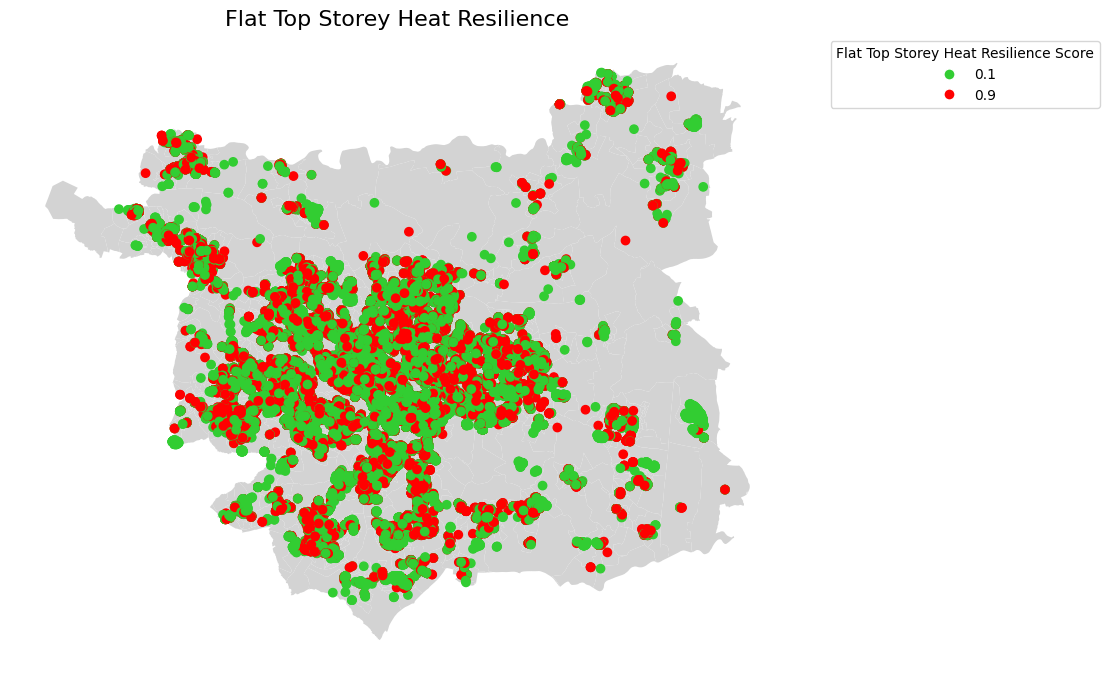

In [39]:
#Map FLAT_TOP_STOREY Heat Susceptibility

from matplotlib.lines import Line2D  #for legend handle

#Assign colors to each FLAT_TOP_STOREY heat stress type
heat_stress_colors = {
    0.1 : 'limegreen',
    0.9 : 'red'}

#Plot Leeds map with colors based in the FLAT_TOP_STOREY heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')


#Remove NAs in column before plotting
Matrix_clean = Matrix.dropna(subset=['FLAT_TOP_STOREY_WEIGHT'])
Matrix_clean.plot(ax=ax, column='FLAT_TOP_STOREY_WEIGHT',
               color=Matrix_clean['FLAT_TOP_STOREY_WEIGHT'].map(heat_stress_colors),
               legend=True)

ax.set_title('Flat Top Storey Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Flat Top Storey Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-40-716e2f4e1256>:15: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix.plot(ax=ax, column='TOTAL_FLOOR_AREA_WEIGHT',


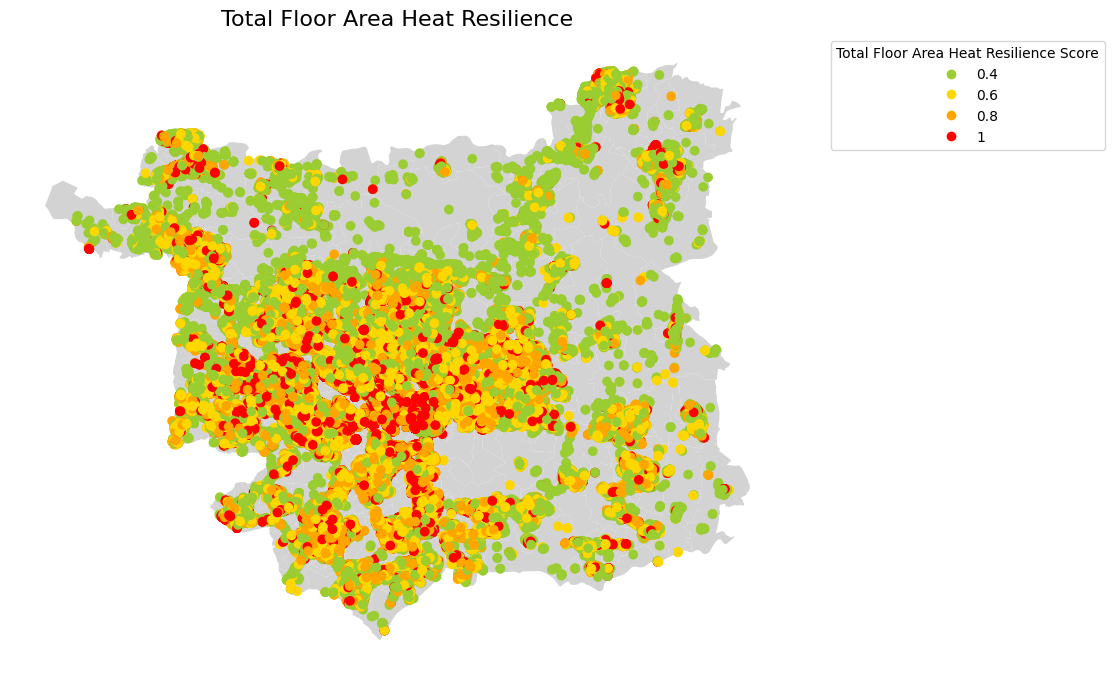

In [40]:
#Map TOTAL_FLOOR_AREA Heat Susceptibility

from matplotlib.lines import Line2D  #for legend handle

#Assign colors to each Property heat stress type
heat_stress_colors = {
    0.4 : 'yellowgreen',
    0.6 : 'gold',
    0.8 : 'orange',
    1 : 'red'}

#Plot Leeds map with colors based in the TOTAL_FLOOR_AREA heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')
Matrix.plot(ax=ax, column='TOTAL_FLOOR_AREA_WEIGHT',
               color=Matrix['TOTAL_FLOOR_AREA_WEIGHT'].map(heat_stress_colors),
               legend=True)

ax.set_title('Total Floor Area Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Total Floor Area Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##Scoring **Walls** heat stress

In [41]:
Matrix['WALLS_DESCRIPTION'].nunique()

423

In [42]:
Matrix['WALLS_DESCRIPTION'].unique()

array(['Sandstone or limestone, as built, no insulation (assumed)',
       'Solid brick, as built, no insulation (assumed)',
       'Cavity wall, as built, insulated (assumed)',
       'Cavity wall, filled cavity',
       'Average thermal transmittance 0.21 W/m-Â¦K',
       'Cavity wall, as built, no insulation (assumed)',
       'Timber frame, as built, partial insulation (assumed)',
       'Sandstone, as built, no insulation (assumed)',
       'Average thermal transmittance 1.72 W/m-Â¦K',
       'Cavity wall, as built, partial insulation (assumed)',
       'Average thermal transmittance 0.23 W/m?K',
       'Average thermal transmittance 0.18 W/m-Â¦K',
       'Average thermal transmittance 0.55 W/m-Â¦K',
       'System built, with internal insulation',
       'System built, as built, insulated (assumed)',
       'Solid brick, with internal insulation',
       'Sandstone, as built, insulated (assumed)',
       'System built, as built, no insulation (assumed)',
       'Average thermal t

In [43]:
Matrix['WALLS_DESCRIPTION'].isna().sum()

np.int64(0)

In [44]:
#dropping null values from Walls_Description dataframe
Matrix = Matrix.dropna(subset=['WALLS_DESCRIPTION'])

In [45]:
Matrix.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 390823 entries, 0 to 398287
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    390823 non-null  int64   
 1   PROPERTY_TYPE            390823 non-null  object  
 2   BUILT_FORM               390801 non-null  object  
 3   TOTAL_FLOOR_AREA         390823 non-null  float64 
 4   FLAT_TOP_STOREY          117727 non-null  object  
 5   MULTI_GLAZE_PROPORTION   365302 non-null  float64 
 6   GLAZED_TYPE              371005 non-null  object  
 7   NUMBER_OPEN_FIREPLACES   386157 non-null  float64 
 8   FLOOR_DESCRIPTION        390798 non-null  object  
 9   WALLS_DESCRIPTION        390823 non-null  object  
 10  ROOF_DESCRIPTION         390624 non-null  object  
 11  CONSTRUCTION_AGE_BAND    387498 non-null  object  
 12  UPRN                     384920 non-null  float64 
 13  geometry                 383875 non-null 

In [46]:
Matrix['WALLS_DESCRIPTION'].value_counts().head()

WALLS_DESCRIPTION
Cavity wall, filled cavity                         97533
Solid brick, as built, no insulation (assumed)     72332
Cavity wall, as built, no insulation (assumed)     55294
Cavity wall, as built, insulated (assumed)         43333
System built, as built, no insulation (assumed)    14194
Name: count, dtype: int64

In [47]:
printed_values = []

for value in Matrix['WALLS_DESCRIPTION']:
    if not any(char.isdigit() for char in value) and value not in printed_values:
        print(value)
        printed_values.append(value)

Sandstone or limestone, as built, no insulation (assumed)
Solid brick, as built, no insulation (assumed)
Cavity wall, as built, insulated (assumed)
Cavity wall, filled cavity
Cavity wall, as built, no insulation (assumed)
Timber frame, as built, partial insulation (assumed)
Sandstone, as built, no insulation (assumed)
Cavity wall, as built, partial insulation (assumed)
System built, with internal insulation
System built, as built, insulated (assumed)
Solid brick, with internal insulation
Sandstone, as built, insulated (assumed)
System built, as built, no insulation (assumed)
Solid brick, as built, insulated (assumed)
Cavity wall, with external insulation
Timber frame, as built, no insulation (assumed)
Timber frame, as built, insulated (assumed)
System built, as built, partial insulation (assumed)
Granite or whinstone, as built, no insulation (assumed)
System built, with external insulation
Cavity wall, with internal insulation
Timber frame, with additional insulation
Solid brick, with 

In [48]:
#This data desperately needs cleaning and sorting!
#will drop the welsh ones, also some are sandstone/limestone or granite/whinstone but for simplicity will group these materials

In [49]:
categories = ['Cavity', 'Brick', 'System built', 'Sandstone', 'Timber frame', 'Granite', 'Park home wall', 'Cob', 'Average']

In [50]:
unique_values = set()  #this is just to check all my categories are correct and the only values left should be Welsh/null, to drop
#set is so only unique values printed and so i can drop any matching values from dataframe

for value in Matrix['WALLS_DESCRIPTION']:
    if not any(cat.lower() in value.lower() for cat in categories):
        if value not in unique_values:
            print(value)
            unique_values.add(value)

Waliau ceudod, fel yGÃ‡Ã–u hadeiladwyd, dim inswleiddio (rhagdybiaeth)
Waliau ceudod, fel y?u hadeiladwyd, dim inswleiddio (rhagdybiaeth)
Briciau solet, fel y?u hadeiladwyd, dim inswleiddio (rhagdybiaeth)


In [51]:
Matrix = Matrix[~Matrix['WALLS_DESCRIPTION'].isin(unique_values)]

In [52]:
#average was just to make sure thermal transmitter values were not removed from the dataframe but it's not a building material so
#i am removing it from my list
categories.remove('Average')

In [53]:
fullcategories = []
for material in categories:
    fullcategories.append(material)
    fullcategories.append(f'{material}, no insulation')

print(fullcategories)

['Cavity', 'Cavity, no insulation', 'Brick', 'Brick, no insulation', 'System built', 'System built, no insulation', 'Sandstone', 'Sandstone, no insulation', 'Timber frame', 'Timber frame, no insulation', 'Granite', 'Granite, no insulation', 'Park home wall', 'Park home wall, no insulation', 'Cob', 'Cob, no insulation']


In [54]:
def wall_type(wall_mat):
    wall_mat = str(wall_mat).lower()
    if 'average' in wall_mat.lower():
        return wall_mat

    for material in categories:
        if material.lower() in wall_mat.lower():
            if 'no insulation' in wall_mat.lower():
                # Return the material type category with no insulation
                return f'{material.capitalize()}, no insulation'
            else:
                return material.capitalize()

In [55]:
Matrix['walltest'] = Matrix['WALLS_DESCRIPTION'].apply(wall_type)

In [56]:
Matrix['walltest'].nunique()

377

In [57]:
#before I convert these tidied material types into assumed u-values, I will extract the known u-values from the data.

In [58]:
materialsdict = {'Cavity': 0.25, 'Cavity, no insulation': 1.25, 'Brick': 0.3, 'Brick, no insulation': 1.75,
             'System built': 0.25, 'System built, no insulation': 2.0, 'Sandstone': 0.4,
             'Sandstone, no insulation': 2.0, 'Timber frame': 0.25, 'Timber frame, no insulation': 1.5,
             'Granite': 0.4, 'Granite, no insulation': 1.6, 'Park home wall': 0.3,
             'Park home wall, no insulation': 2.0, 'Cob': 1.0, 'Cob, no insulation': 0.2}

In [59]:
def wall_uvalue(wall_info):

    for material, uvalue in materialsdict.items():
        if material in wall_info:
            return uvalue

    return wall_info

In [60]:
import re

def extract_average(wall_desc):
    desc = str(wall_desc).lower()

    if 'average' in desc:
        cleaned_desc = re.sub(r'[^0-9\.]', '', str(wall_desc))
        match = re.search(r'(\d+\.\d+)', cleaned_desc)

        if match:
            return float(match.group(0))

    return wall_desc

In [61]:
Matrix['walltest2'] = Matrix['walltest'].apply(wall_uvalue)

In [62]:
Matrix['walltest2'] = Matrix['walltest2'].apply(extract_average)

In [63]:
Matrix[['WALLS_DESCRIPTION', 'walltest', 'walltest2']].head(15)

WALLS_DESCRIPTION  \
0   Sandstone or limestone, as built, no insulatio...   
1      Solid brick, as built, no insulation (assumed)   
2          Cavity wall, as built, insulated (assumed)   
3                          Cavity wall, filled cavity   
4          Cavity wall, as built, insulated (assumed)   
5                          Cavity wall, filled cavity   
6          Average thermal transmittance 0.21 W/m-Â¦K   
7      Solid brick, as built, no insulation (assumed)   
9                          Cavity wall, filled cavity   
10         Cavity wall, as built, insulated (assumed)   
11                         Cavity wall, filled cavity   
12     Cavity wall, as built, no insulation (assumed)   
13  Timber frame, as built, partial insulation (as...   
14         Cavity wall, as built, insulated (assumed)   
15       Sandstone, as built, no insulation (assumed)   

                                      walltest  walltest2  
0                     Sandstone, no insulation       0.40  
1                         Brick, no insulation       0.30  
2                                       Cavity       0.25  
3                                       Cavity       0.25  
4                                       Cavity       0.25  
5                                       Cavity       0.25  
6   average thermal transmittance 0.21 w/m-â¦k       0.21  
7                         Brick, no insulation       0.30  
9                                       Cavity       0.25  
10                                      Cavity       0.25  
11                                      Cavity       0.25  
12                       Cavity, no insulation       0.25  
13                                Timber frame       0.25  
14                                      Cavity       0.25  
15                    Sandstone, no insulation       0.40

In [64]:
#Now all these functions are shown to have worked, I can change the final dataframe!

In [65]:
Matrix = Matrix.drop(columns=['walltest','walltest2'])

In [66]:
Matrix['wall_Uvalue'] = Matrix['WALLS_DESCRIPTION'].apply(wall_type)

In [67]:
Matrix['wall_Uvalue'] = Matrix['wall_Uvalue'].apply(wall_uvalue)

In [68]:
Matrix['wall_Uvalue'] = Matrix['wall_Uvalue'].apply(extract_average)

In [69]:
Matrix['wall_Uvalue'].isna().sum()

np.int64(0)

In [70]:
Matrix['wall_Uvalue'].describe()

count    390819.000000
mean          0.295685
std           0.190734
min           0.000000
25%           0.250000
50%           0.250000
75%           0.300000
max           2.280000
Name: wall_Uvalue, dtype: float64

In [71]:
Matrix.head()

Index PROPERTY_TYPE            BUILT_FORM  TOTAL_FLOOR_AREA  \
0      1          Flat  Enclosed End-Terrace              65.0   
1      2         House           End-Terrace             140.0   
2      3      Bungalow         Semi-Detached              58.0   
3      4      Bungalow         Semi-Detached              49.0   
4      5         House         Semi-Detached              62.0   

  FLAT_TOP_STOREY  MULTI_GLAZE_PROPORTION  \
0               N                   100.0   
1             NaN                   100.0   
2             NaN                   100.0   
3             NaN                   100.0   
4             NaN                   100.0   

                                     GLAZED_TYPE  NUMBER_OPEN_FIREPLACES  \
0           double glazing installed before 2002                     0.0   
1           double glazing, unknown install date                     0.0   
2  double glazing installed during or after 2002                     0.0   
3           double glazing, unknown install date                     0.0   
4  double glazing installed during or after 2002                     0.0   

                    FLOOR_DESCRIPTION  \
0              (other premises below)   
1      Solid, no insulation (assumed)   
2      Suspended, insulated (assumed)   
3  Suspended, no insulation (assumed)   
4  Suspended, no insulation (assumed)   

                                   WALLS_DESCRIPTION  ...  \
0  Sandstone or limestone, as built, no insulatio...  ...   
1     Solid brick, as built, no insulation (assumed)  ...   
2         Cavity wall, as built, insulated (assumed)  ...   
3                         Cavity wall, filled cavity  ...   
4         Cavity wall, as built, insulated (assumed)  ...   

                        geometry heat_stres  heat_str_1  \
0   POINT (421724.58 435187.593)       High         4.0   
1       POINT (430374.01 435008)       High         4.0   
2  POINT (427427.012 432501.008)       High         4.0   
3  POINT (427072.017 432713.007)       High         4.0   
4  POINT (434242.012 436068.999)     Medium         3.0   

                                             LMK_KEY Roof_Score  \
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...        0.6   
1  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...        1.0   
2  18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...        0.2   
3  18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...        0.6   
4                  275687798052018050310193492080467        0.8   

   PROPERTY_TYPE_WEIGHT BUILT_FORM_WEIGHT  FLAT_TOP_STOREY_WEIGHT  \
0                   0.9               0.4                     0.1   
1                   0.6               0.3                     NaN   
2                   0.5               NaN                     NaN   
3                   0.5               NaN                     NaN   
4                   0.6               NaN                     NaN   

   TOTAL_FLOOR_AREA_WEIGHT  wall_Uvalue  
0                      0.8         0.40  
1                      0.4         0.30  
2                      0.8         0.25  
3                      1.0         0.25  
4                      0.8         0.25  

[5 rows x 23 columns]

In [72]:
bins = [0, 0.24, 0.26, 0.29, 0.45, float('inf')]
labels = ['Excellent', 'Good (Legal Limit)', 'Moderate', 'Poor', 'Bad']

In [73]:
Matrix['wall_rating'] = pd.cut(Matrix['wall_Uvalue'], bins=bins, labels=labels)

In [74]:
Matrix['wall_rating'] = Matrix['wall_rating'].astype(str)

In [75]:
Matrix['wall_rating'].value_counts()

wall_rating
Good (Legal Limit)    249990
Poor                  109660
Excellent              13606
Moderate                8892
Bad                     8621
nan                       50
Name: count, dtype: int64

In [76]:
wall_scores = {
    'Excellent': 0.2,
    'Good (Legal Limit)': 0.4,
    'Moderate': 0.6,
    'Poor': 0.8,
    'Bad': 1
}

#apply standardised scores
Matrix['Wall_Score'] = Matrix['wall_rating'].map(wall_scores)

In [77]:
Matrix.head()

Index PROPERTY_TYPE            BUILT_FORM  TOTAL_FLOOR_AREA  \
0      1          Flat  Enclosed End-Terrace              65.0   
1      2         House           End-Terrace             140.0   
2      3      Bungalow         Semi-Detached              58.0   
3      4      Bungalow         Semi-Detached              49.0   
4      5         House         Semi-Detached              62.0   

  FLAT_TOP_STOREY  MULTI_GLAZE_PROPORTION  \
0               N                   100.0   
1             NaN                   100.0   
2             NaN                   100.0   
3             NaN                   100.0   
4             NaN                   100.0   

                                     GLAZED_TYPE  NUMBER_OPEN_FIREPLACES  \
0           double glazing installed before 2002                     0.0   
1           double glazing, unknown install date                     0.0   
2  double glazing installed during or after 2002                     0.0   
3           double glazing, unknown install date                     0.0   
4  double glazing installed during or after 2002                     0.0   

                    FLOOR_DESCRIPTION  \
0              (other premises below)   
1      Solid, no insulation (assumed)   
2      Suspended, insulated (assumed)   
3  Suspended, no insulation (assumed)   
4  Suspended, no insulation (assumed)   

                                   WALLS_DESCRIPTION  ... heat_str_1  \
0  Sandstone or limestone, as built, no insulatio...  ...        4.0   
1     Solid brick, as built, no insulation (assumed)  ...        4.0   
2         Cavity wall, as built, insulated (assumed)  ...        4.0   
3                         Cavity wall, filled cavity  ...        4.0   
4         Cavity wall, as built, insulated (assumed)  ...        3.0   

                                             LMK_KEY  Roof_Score  \
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...         0.6   
1  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...         1.0   
2  18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...         0.2   
3  18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...         0.6   
4                  275687798052018050310193492080467         0.8   

  PROPERTY_TYPE_WEIGHT BUILT_FORM_WEIGHT  FLAT_TOP_STOREY_WEIGHT  \
0                  0.9               0.4                     0.1   
1                  0.6               0.3                     NaN   
2                  0.5               NaN                     NaN   
3                  0.5               NaN                     NaN   
4                  0.6               NaN                     NaN   

  TOTAL_FLOOR_AREA_WEIGHT  wall_Uvalue         wall_rating  Wall_Score  
0                     0.8         0.40                Poor         0.8  
1                     0.4         0.30                Poor         0.8  
2                     0.8         0.25  Good (Legal Limit)         0.4  
3                     1.0         0.25  Good (Legal Limit)         0.4  
4                     0.8         0.25  Good (Legal Limit)         0.4  

[5 rows x 25 columns]

<ipython-input-78-01bc0bf2971d>:15: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix_clean.plot(ax=ax, column='wall_rating',


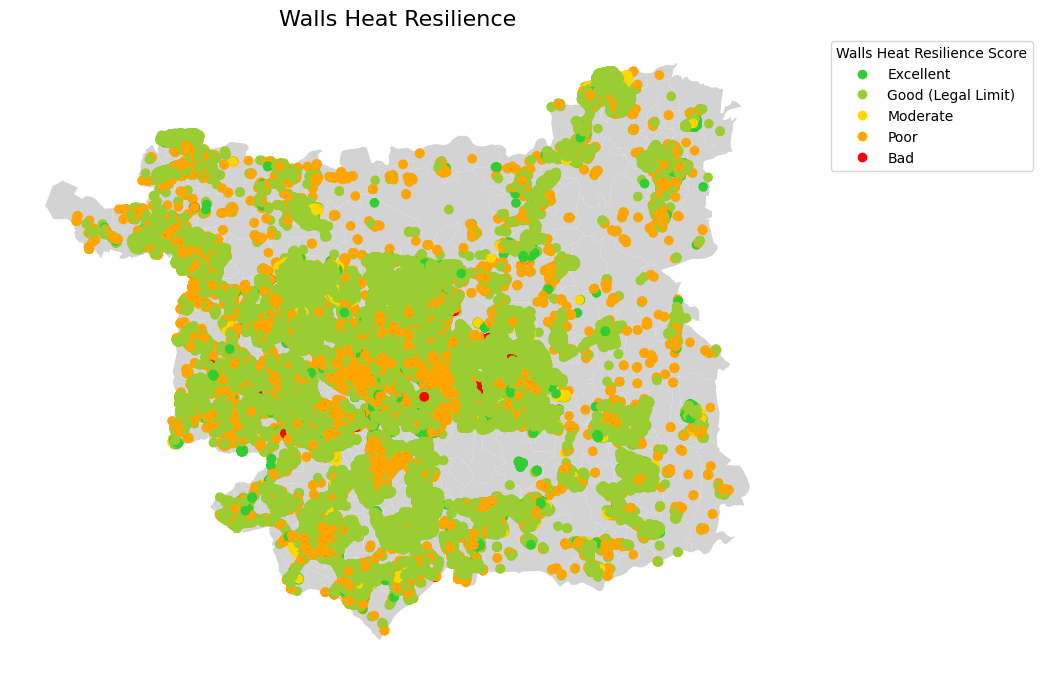

In [78]:
from matplotlib.lines import Line2D  # for legend handle

#Assign colors to each heat stress type
heat_stress_colors = {
    'Excellent': 'limegreen',
    'Good (Legal Limit)': 'yellowgreen',
    'Moderate': 'gold',
    'Poor': 'orange',
    'Bad': 'red'}

#Plot Leeds map with colors based in the Walls heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')
Matrix_clean = Matrix[Matrix['wall_rating'] != 'nan'] #remove nan rows
Matrix_clean.plot(ax=ax, column='wall_rating',
               color=Matrix_clean['wall_rating'].map(heat_stress_colors),
               legend=True)
ax.set_title('Walls Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Walls Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Scoring **Property Age** heat stress

In [79]:
Matrix['CONSTRUCTION_AGE_BAND'].str.count("NO DATA!").sum()

np.float64(23104.0)

In [80]:
Matrix['CONSTRUCTION_AGE_BAND'].unique()

array(['England and Wales: before 1900', 'England and Wales: 1900-1929',
       'England and Wales: 2007-2011', 'England and Wales: 1983-1990',
       'England and Wales: 1976-1982', 'NO DATA!',
       'England and Wales: 1967-1975', 'England and Wales: 1996-2002',
       'England and Wales: 2007 onwards', 'England and Wales: 1950-1966',
       'England and Wales: 1930-1949', 'England and Wales: 1991-1995',
       'England and Wales: 2003-2006', 'England and Wales: 2012 onwards',
       'INVALID!', '2014', nan, '2016', '2021', '2020', '2018', '1965',
       '2019', '2017', '2022', '2013', '1900', '1969', '2023', '1890',
       '2024', '1994', '2010', '1963', '1960', '1957', '2012'],
      dtype=object)

In [81]:
Matrix['CONSTRUCTION_AGE_BAND'].isna().sum()

np.int64(3325)

In [82]:
#drop NaN, NO DATA!, and invalid rows
Matrix = Matrix[~Matrix['CONSTRUCTION_AGE_BAND'].isin([None, 'NO DATA!', 'INVALID!'])]
Matrix = Matrix[~Matrix['CONSTRUCTION_AGE_BAND'].isna()]
Matrix['CONSTRUCTION_AGE_BAND'].unique()

array(['England and Wales: before 1900', 'England and Wales: 1900-1929',
       'England and Wales: 2007-2011', 'England and Wales: 1983-1990',
       'England and Wales: 1976-1982', 'England and Wales: 1967-1975',
       'England and Wales: 1996-2002', 'England and Wales: 2007 onwards',
       'England and Wales: 1950-1966', 'England and Wales: 1930-1949',
       'England and Wales: 1991-1995', 'England and Wales: 2003-2006',
       'England and Wales: 2012 onwards', '2014', '2016', '2021', '2020',
       '2018', '1965', '2019', '2017', '2022', '2013', '1900', '1969',
       '2023', '1890', '2024', '1994', '2010', '1963', '1960', '1957',
       '2012'], dtype=object)

In [83]:
#to categorise this data, I will sort it into 5 different categories. To do this, I will make some assumptions with the rows which only
#provide a year-range and not a specific year, that the property was built in the middle of the year range.

agebanddict = {'England and Wales: before 1900' : 1900, 'England and Wales: 1900-1929' : 1915,
       'England and Wales: 2007-2011' : 2009, 'England and Wales: 1983-1990' : 1987,
       'England and Wales: 1976-1982' : 1979, 'England and Wales: 1967-1975' : 1971,
       'England and Wales: 1996-2002' : 1999, 'England and Wales: 2007 onwards' : 2007,
       'England and Wales: 1950-1966' : 1958, 'England and Wales: 1930-1949' : 1938,
       'England and Wales: 1991-1995': 1993, 'England and Wales: 2003-2006' : 2004,
       'England and Wales: 2012 onwards' : 2012}

In [84]:
def get_cleaned_year(age_info):
    if isinstance(age_info, str):  #Only run if value is a string
        for unclean, year in agebanddict.items():
            if unclean in age_info:
                return year
    return age_info  #If not a string, return original value (float/year)

In [85]:
Matrix['construction_age'] = Matrix['CONSTRUCTION_AGE_BAND'].apply(get_cleaned_year)

In [86]:
Matrix.head()

Index PROPERTY_TYPE            BUILT_FORM  TOTAL_FLOOR_AREA  \
0      1          Flat  Enclosed End-Terrace              65.0   
1      2         House           End-Terrace             140.0   
2      3      Bungalow         Semi-Detached              58.0   
3      4      Bungalow         Semi-Detached              49.0   
4      5         House         Semi-Detached              62.0   

  FLAT_TOP_STOREY  MULTI_GLAZE_PROPORTION  \
0               N                   100.0   
1             NaN                   100.0   
2             NaN                   100.0   
3             NaN                   100.0   
4             NaN                   100.0   

                                     GLAZED_TYPE  NUMBER_OPEN_FIREPLACES  \
0           double glazing installed before 2002                     0.0   
1           double glazing, unknown install date                     0.0   
2  double glazing installed during or after 2002                     0.0   
3           double glazing, unknown install date                     0.0   
4  double glazing installed during or after 2002                     0.0   

                    FLOOR_DESCRIPTION  \
0              (other premises below)   
1      Solid, no insulation (assumed)   
2      Suspended, insulated (assumed)   
3  Suspended, no insulation (assumed)   
4  Suspended, no insulation (assumed)   

                                   WALLS_DESCRIPTION  ...  \
0  Sandstone or limestone, as built, no insulatio...  ...   
1     Solid brick, as built, no insulation (assumed)  ...   
2         Cavity wall, as built, insulated (assumed)  ...   
3                         Cavity wall, filled cavity  ...   
4         Cavity wall, as built, insulated (assumed)  ...   

                                             LMK_KEY Roof_Score  \
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...        0.6   
1  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...        1.0   
2  18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...        0.2   
3  18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...        0.6   
4                  275687798052018050310193492080467        0.8   

   PROPERTY_TYPE_WEIGHT BUILT_FORM_WEIGHT FLAT_TOP_STOREY_WEIGHT  \
0                   0.9               0.4                    0.1   
1                   0.6               0.3                    NaN   
2                   0.5               NaN                    NaN   
3                   0.5               NaN                    NaN   
4                   0.6               NaN                    NaN   

   TOTAL_FLOOR_AREA_WEIGHT wall_Uvalue         wall_rating  Wall_Score  \
0                      0.8        0.40                Poor         0.8   
1                      0.4        0.30                Poor         0.8   
2                      0.8        0.25  Good (Legal Limit)         0.4   
3                      1.0        0.25  Good (Legal Limit)         0.4   
4                      0.8        0.25  Good (Legal Limit)         0.4   

   construction_age  
0              1900  
1              1915  
2              2009  
3              1987  
4              1987  

[5 rows x 26 columns]

In [87]:
Matrix.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 363932 entries, 0 to 398287
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    363932 non-null  int64   
 1   PROPERTY_TYPE            363932 non-null  object  
 2   BUILT_FORM               363910 non-null  object  
 3   TOTAL_FLOOR_AREA         363932 non-null  float64 
 4   FLAT_TOP_STOREY          115252 non-null  object  
 5   MULTI_GLAZE_PROPORTION   361572 non-null  float64 
 6   GLAZED_TYPE              345728 non-null  object  
 7   NUMBER_OPEN_FIREPLACES   363287 non-null  float64 
 8   FLOOR_DESCRIPTION        363918 non-null  object  
 9   WALLS_DESCRIPTION        363932 non-null  object  
 10  ROOF_DESCRIPTION         363741 non-null  object  
 11  CONSTRUCTION_AGE_BAND    363932 non-null  object  
 12  UPRN                     358527 non-null  float64 
 13  geometry                 357899 non-null 

In [88]:
Matrix['construction_age'] = Matrix['construction_age'].apply(lambda x: int(x))

In [89]:
bins_age = [0, 1965, 1984, 2003, 2010, 2025]
labels_age = ['Pre-1965', '1966-1984', '1985-2003', '2004-2010', '2011 onwards']

In [90]:
Matrix['age_rating'] = pd.cut(Matrix['construction_age'], bins=bins_age, labels=labels_age)

In [91]:
Matrix['age_rating'].value_counts()

age_rating
Pre-1965        223576
1966-1984        51506
1985-2003        43319
2004-2010        28716
2011 onwards     16815
Name: count, dtype: int64

In [92]:
#creating score for the index
age_score = {'Pre-1965' : 1, '1966-1984' : 0.8, '1985-2003' : 0.6, '2004-2010' : 0.4, '2011 onwards': 0.2}

In [93]:
Matrix['constructionagescore'] = Matrix['age_rating'].map(age_score)

In [94]:
Matrix['constructionagescore'] = Matrix['constructionagescore'].astype(float)

In [95]:
Matrix.head()

Index PROPERTY_TYPE            BUILT_FORM  TOTAL_FLOOR_AREA  \
0      1          Flat  Enclosed End-Terrace              65.0   
1      2         House           End-Terrace             140.0   
2      3      Bungalow         Semi-Detached              58.0   
3      4      Bungalow         Semi-Detached              49.0   
4      5         House         Semi-Detached              62.0   

  FLAT_TOP_STOREY  MULTI_GLAZE_PROPORTION  \
0               N                   100.0   
1             NaN                   100.0   
2             NaN                   100.0   
3             NaN                   100.0   
4             NaN                   100.0   

                                     GLAZED_TYPE  NUMBER_OPEN_FIREPLACES  \
0           double glazing installed before 2002                     0.0   
1           double glazing, unknown install date                     0.0   
2  double glazing installed during or after 2002                     0.0   
3           double glazing, unknown install date                     0.0   
4  double glazing installed during or after 2002                     0.0   

                    FLOOR_DESCRIPTION  \
0              (other premises below)   
1      Solid, no insulation (assumed)   
2      Suspended, insulated (assumed)   
3  Suspended, no insulation (assumed)   
4  Suspended, no insulation (assumed)   

                                   WALLS_DESCRIPTION  ...  \
0  Sandstone or limestone, as built, no insulatio...  ...   
1     Solid brick, as built, no insulation (assumed)  ...   
2         Cavity wall, as built, insulated (assumed)  ...   
3                         Cavity wall, filled cavity  ...   
4         Cavity wall, as built, insulated (assumed)  ...   

  PROPERTY_TYPE_WEIGHT BUILT_FORM_WEIGHT  FLAT_TOP_STOREY_WEIGHT  \
0                  0.9               0.4                     0.1   
1                  0.6               0.3                     NaN   
2                  0.5               NaN                     NaN   
3                  0.5               NaN                     NaN   
4                  0.6               NaN                     NaN   

  TOTAL_FLOOR_AREA_WEIGHT wall_Uvalue         wall_rating Wall_Score  \
0                     0.8        0.40                Poor        0.8   
1                     0.4        0.30                Poor        0.8   
2                     0.8        0.25  Good (Legal Limit)        0.4   
3                     1.0        0.25  Good (Legal Limit)        0.4   
4                     0.8        0.25  Good (Legal Limit)        0.4   

   construction_age  age_rating  constructionagescore  
0              1900    Pre-1965                   1.0  
1              1915    Pre-1965                   1.0  
2              2009   2004-2010                   0.4  
3              1987   1985-2003                   0.6  
4              1987   1985-2003                   0.6  

[5 rows x 28 columns]

Map Age Score

<ipython-input-96-7301f9745eda>:15: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix.plot(ax=ax, column='constructionagescore',


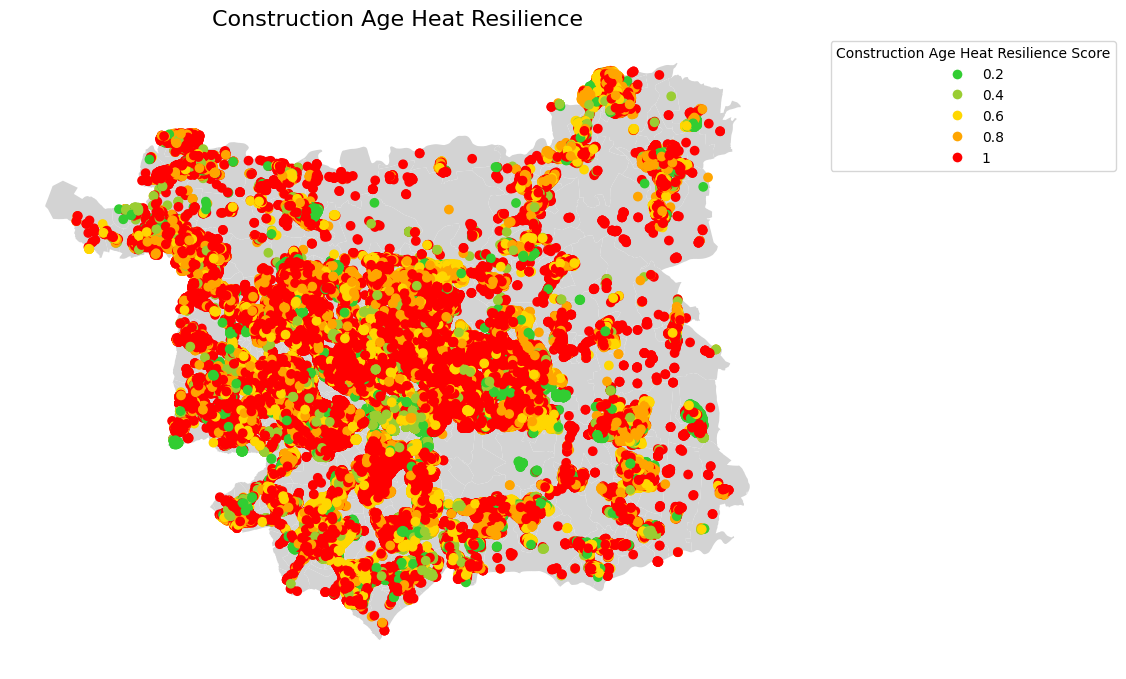

In [96]:
from matplotlib.lines import Line2D  #for legend handle

#Plot Roof Heat Stress scores
#Assign colors to each roof heat stress type
heat_stress_colors = {
    0.2 : 'limegreen',
    0.4 : 'yellowgreen',
    0.6 : 'gold',
    0.8 : 'orange',
    1 : 'red'}

#Plot Leeds map with colors based in the roof heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')
Matrix.plot(ax=ax, column='constructionagescore',
               color=Matrix['constructionagescore'].map(heat_stress_colors),
               legend=True)

ax.set_title('Construction Age Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Construction Age Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Scoring **Floor** heat stress

In [97]:
Floor = Matrix[['FLOOR_DESCRIPTION', 'Index']]

In [98]:
NA = Floor.isnull().sum()
print(NA)

FLOOR_DESCRIPTION    14
Index                 0
dtype: int64


In [99]:
# Drop the NaN's in Floor Description
Floor = Floor.dropna(subset=['FLOOR_DESCRIPTION'])

In [100]:
# Remove redundant values
DROP = ['Conservatory','SAP05:Floor']
Floor=Floor[~Floor['FLOOR_DESCRIPTION'].isin(DROP)]

In [101]:
Floor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363913 entries, 0 to 398287
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   FLOOR_DESCRIPTION  363913 non-null  object
 1   Index              363913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.3+ MB


In [102]:
# Extract the float value if 'FLOOR_DESCRIPTION' starts with "Average thermal transmittance"
Floor['Extracted_Float'] = Floor['FLOOR_DESCRIPTION'].str.extract(
    r'^Average thermal transmittance\s*=?\s*(\d+\.\d+)'
)

In [103]:
Floor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363913 entries, 0 to 398287
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   FLOOR_DESCRIPTION  363913 non-null  object
 1   Index              363913 non-null  int64 
 2   Extracted_Float    7969 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.1+ MB


In [104]:
# Clean Floor Description value names, add category and score
Floor_org = [
    ['FLOOR_DESCRIPTION', 'Floor_Cleaned', 'Floor_Category', 'Floor_Score'],
    ['(another dwelling below)', 'Premises below', 'Moderate',0.6],
    ['(other premises below)', 'Premises below', 'Moderate',0.6],
    ['(other premises below)|(eiddo arall islaw)', 'Premises below', 'Moderate',0.6],
    ['(Same dwelling below) insulated (assumed)', 'Premises below', 'Moderate',0.6],
    [', insulated (assumed)', 'Insulation (assumed)', 'Good', 0.4],
    [', no insulation (assumed)', 'No insulation (assumed)', 'Poor', 0.8],
    ['Crog, dim inswleiddio (rhagdybiaeth)', 'Suspended, no insulation (assumed)', 'Poor', 0.8],
    ['limited insulation (assumed)', 'Limited insulation (assumed)', 'Moderate',0.6],
    ['no insulation (assumed)', 'No insulation (assumed)', 'Poor', 0.8],
    ['Other premises below', 'Premises below', 'Moderate',0.6],
    ['Solet, dim inswleiddio (rhagdybiaeth)', 'Solid, no insulation (assumed)', 'Poor', 0.8],
    ['Solid,  insulated (assumed)', 'Solid, insulation (assumed)', 'Very Good', 0.2],
    ['Solid, insulated', 'Solid, insulation', 'Very Good', 0.2],
    ['Solid, insulated (assumed)', 'Solid, insulation (assumed)', 'Very Good', 0.2],
    ['Solid, limited insulation (assumed)', 'Solid, limited insulation (assumed)', 'Moderate',0.6],
    ['Solid, no insulation (assumed)', 'Solid, no insulation (assumed)', 'Poor', 0.8],
    ['Suspended', 'Suspended', 'Moderate',0.6],
    ['Suspended, insulated', 'Suspended, insulation', 'Very Good', 0.2],
    ['Suspended, insulated (assumed)', 'Suspended, insulation (assumed)', 'Very Good', 0.2],
    ['Suspended, limited insulation (assumed)', 'Suspended, limited insulation (assumed)', 'Moderate',0.6],
    ['Suspended, no insulation (assumed)', 'Suspended, no insulation (assumed)', 'Poor', 0.8],
    ['To external air, insulated', 'To external air, insulation', 'Good', 0.4],
    ['To external air, insulated (assumed)', 'To external air, insulation (assumed)', 'Good', 0.4],
    ['To external air, limited insulation (assumed)', 'To external air, limited insulation (assumed)', 'Moderate',0.6],
    ['To external air, no insulation (assumed)', 'To external air, no insulation (assumed)', 'Very Poor' , 1],
    ['To external air, uninsulated (assumed)', 'To external air, no insulation (assumed)', 'Very Poor' , 1],
    ['To unheated space,', 'To unheated space', 'Moderate',0.6],
    ['To unheated space, insulated (assumed)', 'To unheated space, insulation (assumed)', 'Good', 0.4],
    ['To unheated space, no insulation (assumed)', 'To unheated space, no insulation (assumed)', 'Very Poor' , 1],
    ['To unheated space, insulated', 'To unheated space, insulation', 'Good', 0.4],
    ['To unheated space, insulated (assumed)', 'To unheated space, insulation (assumed)', 'Good', 0.4],
    ['To unheated space,  insulated (assumed)', 'To unheated space, insulation (assumed)', 'Good', 0.4],
    ['To unheated space, limited insulation (assumed)', 'To unheated space, limited insulation (assumed)', 'Moderate',0.6],
    ['To unheated space, no insulation (assumed)', 'To unheated space, no insulation (assumed)', 'Very Poor' , 1],
    ['To unheated space,  no insulation (assumed)', 'To unheated space, no insulation (assumed)', 'Very Poor' , 1],
    ['To unheated space, uninsulated (assumed)', 'To unheated space, no insulation (assumed)', 'Very Poor' , 1]
]

In [105]:
# Create a new dataframe from the Floor_org list
columns = Floor_org[0]
data = Floor_org[1:]
Floor_df = pd.DataFrame(data, columns=columns)

In [106]:
# New subset removing all values that startswith Average thermal transmittance
Floor1 = Floor[~Floor['FLOOR_DESCRIPTION'].str.startswith('Average thermal transmittance')].copy()

In [107]:
# Drop column
Floor1 = Floor1.drop(columns=['Extracted_Float'])

In [108]:
# Convert Floor_org list to a dictionary
Floor_dict = {row[0]: (row[1], row[2], row[3]) for row in Floor_org[1:]}

# Map dictionary to fill in values in Floor1 df
Floor1[['Floor_Cleaned', 'Floor_Category', 'Floor_Score']] = Floor1['FLOOR_DESCRIPTION'].map(Floor_dict).apply(pd.Series)


In [109]:
Floor1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355944 entries, 0 to 398287
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FLOOR_DESCRIPTION  355944 non-null  object 
 1   Index              355944 non-null  int64  
 2   Floor_Cleaned      355944 non-null  object 
 3   Floor_Category     355944 non-null  object 
 4   Floor_Score        355944 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.3+ MB


In [110]:
Floor1.head()

FLOOR_DESCRIPTION  Index  \
0              (other premises below)      1   
1      Solid, no insulation (assumed)      2   
2      Suspended, insulated (assumed)      3   
3  Suspended, no insulation (assumed)      4   
4  Suspended, no insulation (assumed)      5   

                        Floor_Cleaned Floor_Category  Floor_Score  
0                      Premises below       Moderate          0.6  
1      Solid, no insulation (assumed)           Poor          0.8  
2     Suspended, insulation (assumed)      Very Good          0.2  
3  Suspended, no insulation (assumed)           Poor          0.8  
4  Suspended, no insulation (assumed)           Poor          0.8

In [111]:
NA_rows = Floor1[Floor1.isnull().any(axis=1)]
print(NA_rows)

Empty DataFrame
Columns: [FLOOR_DESCRIPTION, Index, Floor_Cleaned, Floor_Category, Floor_Score]
Index: []


In [112]:
# New subset for all values with Average thermal transmittance
Floor2 = Floor[['FLOOR_DESCRIPTION', 'Extracted_Float', 'Index']]

In [113]:
Floor2 = Floor2[Floor2['FLOOR_DESCRIPTION'].str.startswith('Average thermal transmittance', na=False)]

In [114]:
Floor2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7969 entries, 28 to 398269
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FLOOR_DESCRIPTION  7969 non-null   object
 1   Extracted_Float    7969 non-null   object
 2   Index              7969 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 249.0+ KB


In [115]:
# Drop any NaN's
Floor2 = Floor2.dropna(subset=['Extracted_Float'])

In [116]:
# Change data type
Floor2['Extracted_Float'] = Floor2['Extracted_Float'].astype('float')

In [117]:
# Thresholds = 0.18 legal level, 0.25 considered improvement status, 0.7 final unacceptable level
bins = [ 0.00, 0.18, 0.25, 0.70, 0.71, 5.50]
labels = ['0.00-0.12', '0.13-0.18', '0.19-0.25', '0.26-0.70', '0.71-5.50']

In [118]:
# Create a new column using bins
Floor2['Floor_Thresholds'] = pd.cut(Floor2['Extracted_Float'], bins=bins, labels=labels)

In [119]:
Grouping = {
    'Very Good' : '0.00-0.12',
    'Good' : '0.13-0.18',
    'Moderate' : '0.19-0.25',
    'Poor' : '0.26-0.70',
    'Very Poor' : '0.71-5.50'
}

In [120]:
Scoring = {
    0.2 : 'Very Good',
    0.4 : 'Good',
    0.6 : 'Moderate',
    0.8 : 'Poor',
    1 : 'Very Poor'
}

In [121]:
# Fill 0.00 values with 0.00-0.12 in Threshold
Floor2.loc[Floor2['Extracted_Float'] == 0.00, 'Floor_Thresholds'] = '0.00-0.12'

In [122]:
# Fill Floor2['Category'] using the Grouping dictionary
Floor2['Floor_Category'] = Floor2['Floor_Thresholds'].map({v: k for k, v in Grouping.items()})

In [123]:
# Fill Floor2['Score'] using the Scoring dictionary
Floor2['Floor_Score'] = Floor2['Floor_Category'].map({v: k for k, v in Scoring.items()})

In [124]:
# New Cleaned name column, "Average Thermal Transmittance" + Floor2['Extracted_Float']
Floor2['Floor_Cleaned'] = "Average thermal transmittance " + Floor2['Extracted_Float'].astype(str)

In [125]:
Floor2.head()


FLOOR_DESCRIPTION  Extracted_Float  Index  \
28      Average thermal transmittance 0.25 W/m?K             0.25     29   
556   Average thermal transmittance 0.14 W/m-Â¦K             0.14    557   
626   Average thermal transmittance 0.16 W/m-Â¦K             0.16    627   
981   Average thermal transmittance 0.15 W/m-Â¦K             0.15    982   
1132  Average thermal transmittance 0.15 W/m-Â¦K             0.15   1133   

     Floor_Thresholds Floor_Category Floor_Score  \
28          0.13-0.18           Good         0.4   
556         0.00-0.12      Very Good         0.2   
626         0.00-0.12      Very Good         0.2   
981         0.00-0.12      Very Good         0.2   
1132        0.00-0.12      Very Good         0.2   

                           Floor_Cleaned  
28    Average thermal transmittance 0.25  
556   Average thermal transmittance 0.14  
626   Average thermal transmittance 0.16  
981   Average thermal transmittance 0.15  
1132  Average thermal transmittance 0.15

In [126]:
NA_rows = Floor2[Floor2.isnull().any(axis=1)]
print(NA_rows)

Empty DataFrame
Columns: [FLOOR_DESCRIPTION, Extracted_Float, Index, Floor_Thresholds, Floor_Category, Floor_Score, Floor_Cleaned]
Index: []


In [127]:
Floor1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355944 entries, 0 to 398287
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FLOOR_DESCRIPTION  355944 non-null  object 
 1   Index              355944 non-null  int64  
 2   Floor_Cleaned      355944 non-null  object 
 3   Floor_Category     355944 non-null  object 
 4   Floor_Score        355944 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.3+ MB


In [128]:
Floor2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7969 entries, 28 to 398269
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   FLOOR_DESCRIPTION  7969 non-null   object  
 1   Extracted_Float    7969 non-null   float64 
 2   Index              7969 non-null   int64   
 3   Floor_Thresholds   7969 non-null   category
 4   Floor_Category     7969 non-null   category
 5   Floor_Score        7969 non-null   category
 6   Floor_Cleaned      7969 non-null   object  
dtypes: category(3), float64(1), int64(1), object(2)
memory usage: 335.3+ KB


In [129]:
# Change data type
Floor2['Extracted_Float'] = Floor2['Extracted_Float'].astype('object')
Floor2['Floor_Score'] = Floor2['Floor_Score'].astype('int64')
Floor2['Floor_Category'] = Floor2['Floor_Category'].astype('object')

In [130]:
# Join Floor1 and Floor 2 together
Floor1_concat = Floor1[['FLOOR_DESCRIPTION', 'Floor_Cleaned', 'Floor_Category', 'Floor_Score', 'Index']]
Floor2_concat = Floor2[['FLOOR_DESCRIPTION', 'Floor_Cleaned', 'Floor_Category', 'Floor_Score', 'Index']]

# Concatenate  dataframes
Floor3 = pd.concat([Floor1_concat, Floor2_concat], ignore_index=True)

In [131]:
# Drop redundant columns
Floor3 = Floor3.drop(columns=['Floor_Cleaned', 'Floor_Category'])

In [132]:
# Reorder columns
Floor3 = Floor3.loc[:,['Index', 'FLOOR_DESCRIPTION', 'Floor_Score']]
Floor3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363913 entries, 0 to 363912
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              363913 non-null  int64  
 1   FLOOR_DESCRIPTION  363913 non-null  object 
 2   Floor_Score        363913 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.3+ MB


In [133]:
Floor3['Floor_Score'].unique()

array([0.6, 0.8, 0.2, 1. , 0.4, 0. ])

In [134]:
Floor3.head()

Index                   FLOOR_DESCRIPTION  Floor_Score
0      1              (other premises below)          0.6
1      2      Solid, no insulation (assumed)          0.8
2      3      Suspended, insulated (assumed)          0.2
3      4  Suspended, no insulation (assumed)          0.8
4      5  Suspended, no insulation (assumed)          0.8

In [135]:
Matrix = Matrix.merge(Floor3[['Index', 'Floor_Score']], on='Index', how='left')

In [136]:
Matrix.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 363932 entries, 0 to 363931
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    363932 non-null  int64   
 1   PROPERTY_TYPE            363932 non-null  object  
 2   BUILT_FORM               363910 non-null  object  
 3   TOTAL_FLOOR_AREA         363932 non-null  float64 
 4   FLAT_TOP_STOREY          115252 non-null  object  
 5   MULTI_GLAZE_PROPORTION   361572 non-null  float64 
 6   GLAZED_TYPE              345728 non-null  object  
 7   NUMBER_OPEN_FIREPLACES   363287 non-null  float64 
 8   FLOOR_DESCRIPTION        363918 non-null  object  
 9   WALLS_DESCRIPTION        363932 non-null  object  
 10  ROOF_DESCRIPTION         363741 non-null  object  
 11  CONSTRUCTION_AGE_BAND    363932 non-null  object  
 12  UPRN                     358527 non-null  float64 
 13  geometry                 357899 non-

**Add the floor scores to the overall Matrix**

Make map of Floor scores

In [137]:
Matrix_clean = Matrix[Matrix['Floor_Score'] != 'nan'] #remove nan rows
Matrix_clean['Floor_Score'].unique()

array([0.6, 0.8, 0.2, 0. , 1. , 0.4, nan])

In [138]:
na_count = Matrix['Floor_Score'].isna().sum()
print(na_count)

19


<ipython-input-139-551c9604c7ef>:19: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix_clean.plot(ax=ax, column='Floor_Score',


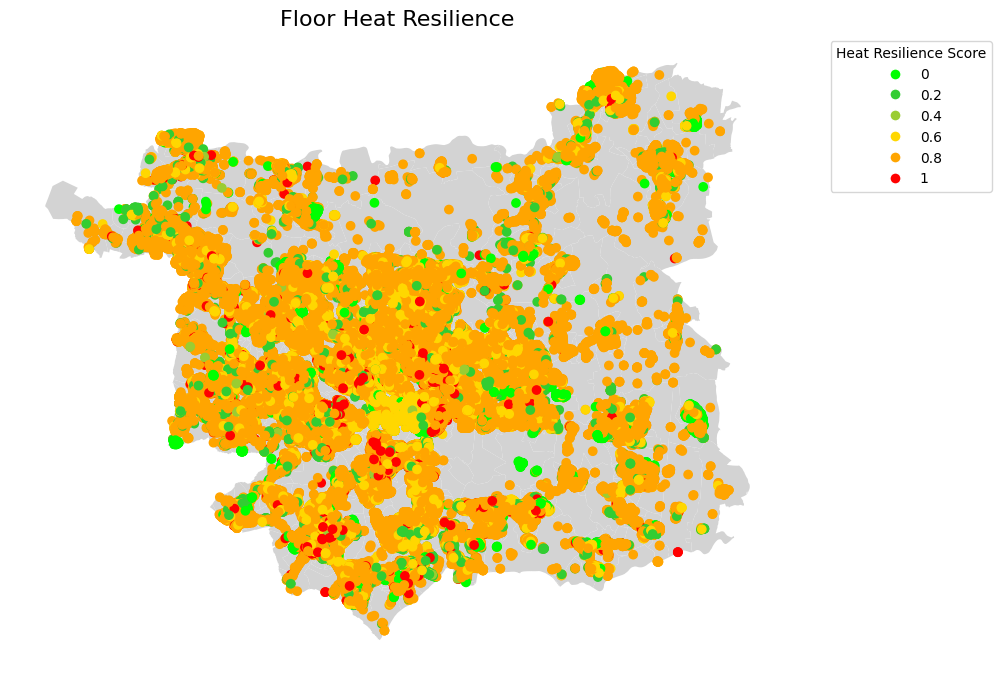

In [139]:
from matplotlib.lines import Line2D  #for legend handle

#Plot Roof Heat Stress scores
#Assign colors to each roof heat stress type
heat_stress_colors = {
    0 : 'lime',
    0.2 : 'limegreen',
    0.4 : 'yellowgreen',
    0.6 : 'gold',
    0.8 : 'orange',
    1 : 'red'}

#Plot Leeds map with colors based in the roof heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')

#Remove NAs in column before plotting
Matrix_clean = Matrix.dropna(subset=['Floor_Score'])
Matrix_clean.plot(ax=ax, column='Floor_Score',
               color=Matrix_clean['Floor_Score'].map(heat_stress_colors),
               legend=True)

ax.set_title('Floor Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Glazing type score and glazing proportion score

In [140]:
Matrix['GLAZED_TYPE'].value_counts()
glazing_types = Matrix['GLAZED_TYPE'].unique()
print(glazing_types)

['double glazing installed before 2002'
 'double glazing, unknown install date'
 'double glazing installed during or after 2002' 'INVALID!' 'NO DATA!'
 'not defined' 'single glazing' 'triple glazing' 'secondary glazing'
 'double, known data' nan 'triple, known data']


In [141]:
glazing_dict = { 'single glazing': 0.8, 'double glazing installed before 2002': 0.6, 'double glazing, unknown install date' : 0.6, 'double glazing installed during or after 2002' : 0.4, 'double, known data': 0.4, 'secondary glazing' : 0.4, 'NO DATA!' : 0.4, 'INVALID!' : 0.4, 'triple glazing': 0.2 }
Matrix["glazing_score"] = Matrix["GLAZED_TYPE"].apply(lambda x: glazing_dict.get(x))
Matrix['glazing_score'].describe()

count    334929.000000
mean          0.539641
std           0.095040
min           0.200000
25%           0.400000
50%           0.600000
75%           0.600000
max           0.800000
Name: glazing_score, dtype: float64

In [142]:
# Fill missing values with 50
Matrix['MULTI_GLAZE_PROPORTION'] = Matrix['MULTI_GLAZE_PROPORTION'].fillna(50)

# Convert glazing to proportion
Matrix['MULTI_GLAZE_PROPORTION2'] = Matrix['MULTI_GLAZE_PROPORTION'] / 100

# Define bins
bins_glaze = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels_glaze = ['0.00-0.20', '0.21-0.40', '0.41-0.60', '0.61-0.80', '0.81-1.00']

# Categorise based on proportion thresholds
Matrix['glaze_prop_category'] = pd.cut(Matrix['MULTI_GLAZE_PROPORTION2'], bins=bins_glaze, labels=labels_glaze, include_lowest=True)

# Define the reverse scoring system
scoring_dict = {
    '0.81-1.00': 0.2,   # Very Good
    '0.61-0.80': 0.4,   # Good
    '0.41-0.60': 0.6,   # Moderate
    '0.21-0.40': 0.8,   # Poor
    '0.00-0.20': 1.0    # Very Poor
}

# Map scores to the categorized values
Matrix['MULTI_GLAZE_PROPORTION_Score'] = Matrix['glaze_prop_category'].map(scoring_dict)


# Display the results
print(Matrix[['MULTI_GLAZE_PROPORTION2', 'glaze_prop_category', 'MULTI_GLAZE_PROPORTION_Score']].head())


   MULTI_GLAZE_PROPORTION2 glaze_prop_category MULTI_GLAZE_PROPORTION_Score
0                      1.0           0.81-1.00                          0.2
1                      1.0           0.81-1.00                          0.2
2                      1.0           0.81-1.00                          0.2
3                      1.0           0.81-1.00                          0.2
4                      1.0           0.81-1.00                          0.2


In [143]:
# Define bins based on the reversed scores
bins_glaze2 = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels_glaze2 = ['Very Good', 'Good', 'Moderate', 'Poor', 'Very Poor']

# Assign categories based on MULTI_GLAZE_PROPORTION_Score
Matrix['glaze_prop_category2'] = pd.cut(Matrix['MULTI_GLAZE_PROPORTION_Score'], bins=bins_glaze2, labels=labels_glaze2, include_lowest=True)

print(Matrix[['MULTI_GLAZE_PROPORTION2', 'MULTI_GLAZE_PROPORTION_Score', 'glaze_prop_category', 'glaze_prop_category2']].head())

   MULTI_GLAZE_PROPORTION2 MULTI_GLAZE_PROPORTION_Score glaze_prop_category  \
0                      1.0                          0.2           0.81-1.00   
1                      1.0                          0.2           0.81-1.00   
2                      1.0                          0.2           0.81-1.00   
3                      1.0                          0.2           0.81-1.00   
4                      1.0                          0.2           0.81-1.00   

  glaze_prop_category2  
0            Very Good  
1            Very Good  
2            Very Good  
3            Very Good  
4            Very Good  


In [144]:
Matrix['MULTI_GLAZE_PROPORTION_Score'] = Matrix['MULTI_GLAZE_PROPORTION_Score'].astype(float)

<ipython-input-145-04f73539275f>:19: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix_clean.plot(ax=ax, column='glazing_score',


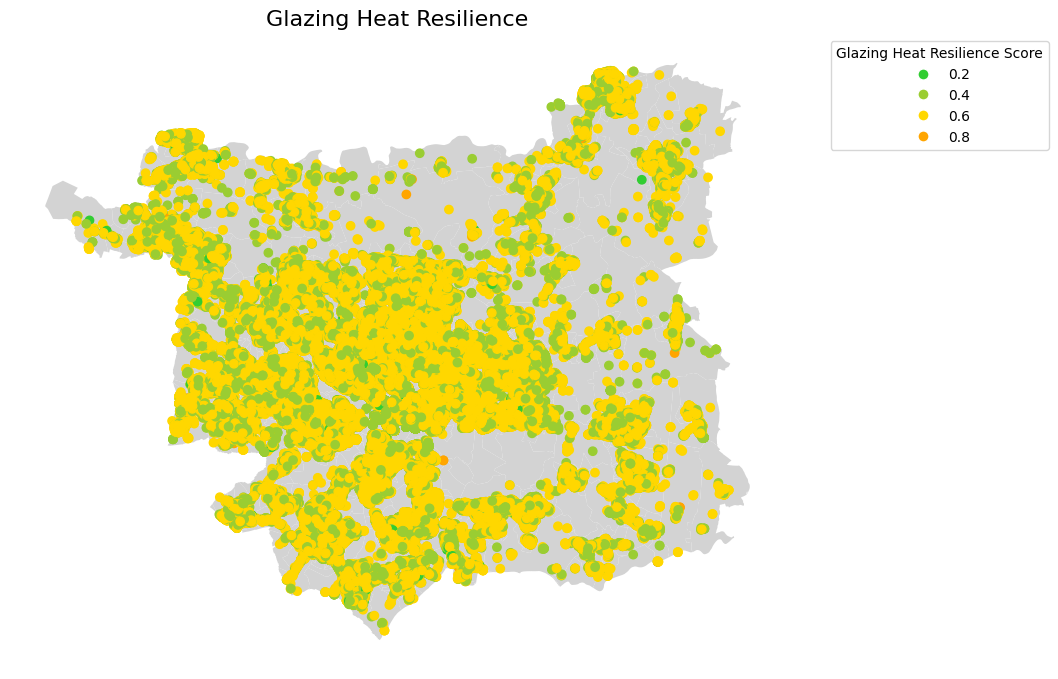

In [145]:
#Map Glazing Type Heat Resilience

from matplotlib.lines import Line2D  #for legend handle

#Assign colors to each heat stress type
heat_stress_colors = {
    0.2 : 'limegreen',
    0.4 : 'yellowgreen',
    0.6 : 'gold',
    0.8 : 'orange'}

#Plot Leeds map with colors based in the Glazing heat resilience
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')


#Remove NAs in column before plotting
Matrix_clean = Matrix.dropna(subset=['glazing_score'])
Matrix_clean.plot(ax=ax, column='glazing_score',
               color=Matrix_clean['glazing_score'].map(heat_stress_colors),
               legend=True)

ax.set_title('Glazing Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Glazing Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-146-178ca3cbbd05>:20: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix_clean.plot(ax=ax, column='glaze_prop_category2',


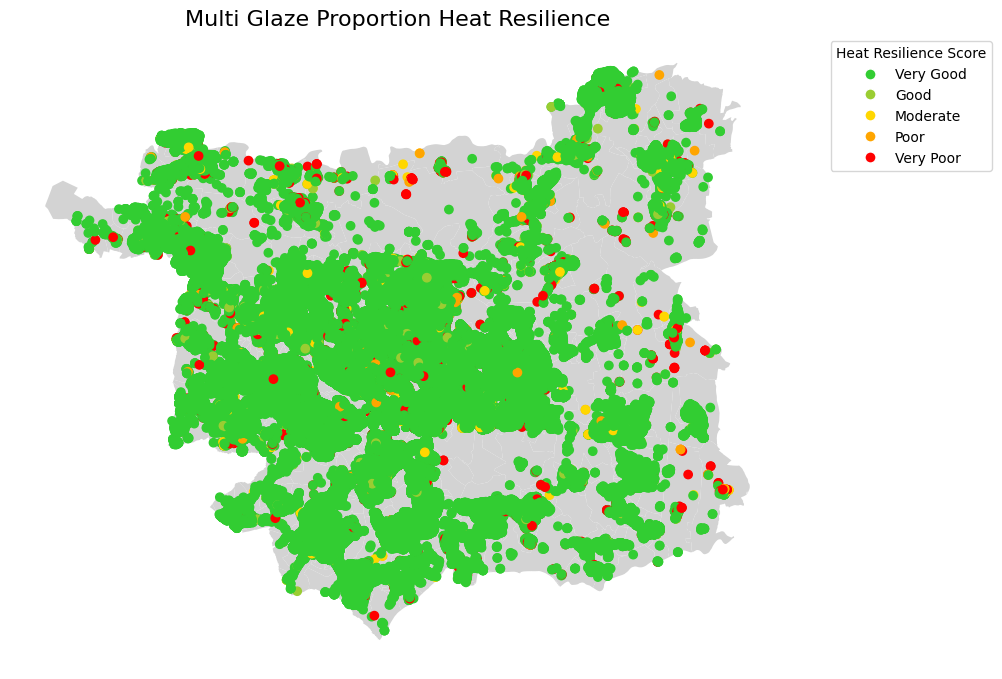

In [146]:
#Map MULTI_GLAZE_PROPORTION Heat Resilience

from matplotlib.lines import Line2D  #for legend handle

#Assign colors to each heat stress type
heat_stress_colors = {
    'Very Good' : 'limegreen',
    'Good' : 'yellowgreen',
    'Moderate' : 'gold',
    'Poor' : 'orange',
    'Very Poor' : 'red'}

#Plot Leeds map with colors based in the MULTI_GLAZE_PROPORTION heat resilience
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')


#Remove NAs in column before plotting
Matrix_clean = Matrix.dropna(subset=['glaze_prop_category2'])
Matrix_clean.plot(ax=ax, column='glaze_prop_category2',
               color=Matrix_clean['glaze_prop_category2'].map(heat_stress_colors),
               legend=True)

ax.set_title('Multi Glaze Proportion Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Calculating overall Heat Resilience Score

In [147]:
Matrix.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 363932 entries, 0 to 363931
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Index                         363932 non-null  int64   
 1   PROPERTY_TYPE                 363932 non-null  object  
 2   BUILT_FORM                    363910 non-null  object  
 3   TOTAL_FLOOR_AREA              363932 non-null  float64 
 4   FLAT_TOP_STOREY               115252 non-null  object  
 5   MULTI_GLAZE_PROPORTION        363932 non-null  float64 
 6   GLAZED_TYPE                   345728 non-null  object  
 7   NUMBER_OPEN_FIREPLACES        363287 non-null  float64 
 8   FLOOR_DESCRIPTION             363918 non-null  object  
 9   WALLS_DESCRIPTION             363932 non-null  object  
 10  ROOF_DESCRIPTION              363741 non-null  object  
 11  CONSTRUCTION_AGE_BAND         363932 non-null  object  
 12  UPRN                  

In [148]:
#Create Final Matrix
Matrix_Final = Matrix[['PROPERTY_TYPE_WEIGHT','BUILT_FORM_WEIGHT','TOTAL_FLOOR_AREA_WEIGHT',
                       'FLAT_TOP_STOREY_WEIGHT','MULTI_GLAZE_PROPORTION_Score','glazing_score',
                       'Wall_Score','Roof_Score','constructionagescore','Floor_Score', 'geometry',
                       'heat_stres', 'Index', 'LMK_KEY']]

In [149]:
Matrix_Final['MULTI_GLAZE_PROPORTION_Score'] = Matrix_Final['MULTI_GLAZE_PROPORTION_Score'].astype(float)


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [150]:
Matrix_Final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 363932 entries, 0 to 363931
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   PROPERTY_TYPE_WEIGHT          363932 non-null  float64 
 1   BUILT_FORM_WEIGHT             234549 non-null  float64 
 2   TOTAL_FLOOR_AREA_WEIGHT       363932 non-null  float64 
 3   FLAT_TOP_STOREY_WEIGHT        115252 non-null  float64 
 4   MULTI_GLAZE_PROPORTION_Score  363932 non-null  float64 
 5   glazing_score                 334929 non-null  float64 
 6   Wall_Score                    363892 non-null  float64 
 7   Roof_Score                    363932 non-null  float64 
 8   constructionagescore          363932 non-null  float64 
 9   Floor_Score                   363913 non-null  float64 
 10  geometry                      357899 non-null  geometry
 11  heat_stres                    357899 non-null  object  
 12  Index                 

In [151]:
#Specify columns to fill NAs with means
columns_to_fill = ['PROPERTY_TYPE_WEIGHT','BUILT_FORM_WEIGHT','TOTAL_FLOOR_AREA_WEIGHT',
                       'FLAT_TOP_STOREY_WEIGHT','MULTI_GLAZE_PROPORTION_Score','glazing_score',
                       'Wall_Score','Roof_Score','constructionagescore','Floor_Score']

#Apply fillna with mean only to the specified columns
Matrix_Final[columns_to_fill] = Matrix_Final[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [152]:
#check there are no more NAs in dataset
na_count = Matrix_Final.isna().sum()
print(na_count)
#Some poinst don't have geometries and cannot be mapped so will drop them

PROPERTY_TYPE_WEIGHT               0
BUILT_FORM_WEIGHT                  0
TOTAL_FLOOR_AREA_WEIGHT            0
FLAT_TOP_STOREY_WEIGHT             0
MULTI_GLAZE_PROPORTION_Score       0
glazing_score                      0
Wall_Score                         0
Roof_Score                         0
constructionagescore               0
Floor_Score                        0
geometry                        6033
heat_stres                      6033
Index                              0
LMK_KEY                            0
dtype: int64


In [153]:
Matrix_Final = Matrix_Final.dropna(subset=['geometry'])
na_count = Matrix_Final.isna().sum()
print(na_count)

PROPERTY_TYPE_WEIGHT            0
BUILT_FORM_WEIGHT               0
TOTAL_FLOOR_AREA_WEIGHT         0
FLAT_TOP_STOREY_WEIGHT          0
MULTI_GLAZE_PROPORTION_Score    0
glazing_score                   0
Wall_Score                      0
Roof_Score                      0
constructionagescore            0
Floor_Score                     0
geometry                        0
heat_stres                      0
Index                           0
LMK_KEY                         0
dtype: int64


In [154]:
#Define weights of each property feature in the overall score
#For now they are all equal to 1 (needs to be changed)
weights = {
  'PROPERTY_TYPE_WEIGHT': 0.25 ,
  'BUILT_FORM_WEIGHT': 0.04,
  'TOTAL_FLOOR_AREA_WEIGHT': 0.25,
  'FLAT_TOP_STOREY_WEIGHT': 0.15,
  'MULTI_GLAZE_PROPORTION_Score': 0.04,
  'glazing_score': 0.04,
  'Wall_Score': 0.1 ,
  'Roof_Score': 0.05,
  'construction_age': 0.04,
  'Floor_Score': 0.04
}


#Create function to apply weight based on property characteritsics weights
def overall_score(row):
    score = 0
    for col, value in row.items():
        if col in weights:
            score += value * weights[col]

    return score

In [155]:
#Create column with overall heat susceptibility score by running function
Matrix_Final['Overall_Heat_Score'] = Matrix_Final.apply(overall_score, axis=1)

#Check
Matrix_Final.head()

PROPERTY_TYPE_WEIGHT  BUILT_FORM_WEIGHT  TOTAL_FLOOR_AREA_WEIGHT  \
0                   0.9           0.400000                      0.8   
1                   0.6           0.300000                      0.4   
2                   0.5           0.530122                      0.8   
3                   0.5           0.530122                      1.0   
4                   0.6           0.530122                      0.8   

   FLAT_TOP_STOREY_WEIGHT  MULTI_GLAZE_PROPORTION_Score  glazing_score  \
0                0.100000                           0.2            0.6   
1                0.351262                           0.2            0.6   
2                0.351262                           0.2            0.4   
3                0.351262                           0.2            0.6   
4                0.351262                           0.2            0.4   

   Wall_Score  Roof_Score  constructionagescore  Floor_Score  \
0         0.8         0.6                   1.0          0.6   
1         0.8         1.0                   1.0          0.8   
2         0.4         0.2                   0.4          0.2   
3         0.4         0.6                   0.6          0.8   
4         0.4         0.8                   0.6          0.8   

                        geometry heat_stres  Index  \
0   POINT (421724.58 435187.593)       High      1   
1       POINT (430374.01 435008)       High      2   
2  POINT (427427.012 432501.008)       High      3   
3  POINT (427072.017 432713.007)       High      4   
4  POINT (434242.012 436068.999)     Medium      5   

                                             LMK_KEY  Overall_Heat_Score  
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...            0.622000  
1  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...            0.508689  
2  18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...            0.480894  
3  18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...            0.582894  
4                  275687798052018050310193492080467            0.559894

Map the properties based on their overall heat resilience score. This will allow to compare side by side the initial Heat Stress map (taking into account only environmental factors) and our property heat susceptibility score.

In [156]:
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Good', 'Good', 'Moderate', 'Poor', 'Very Poor']

Matrix_Final['Heat_Resilience_Category'] = pd.cut(Matrix_Final['Overall_Heat_Score'], bins=bins, labels=labels, include_lowest=True)


In [157]:
Matrix_Final['Heat_Resilience_Category'].value_counts()

Heat_Resilience_Category
Moderate     245545
Poor         107343
Good           3006
Very Poor      2005
Very Good         0
Name: count, dtype: int64

In [158]:
Matrix_Final.head()

PROPERTY_TYPE_WEIGHT  BUILT_FORM_WEIGHT  TOTAL_FLOOR_AREA_WEIGHT  \
0                   0.9           0.400000                      0.8   
1                   0.6           0.300000                      0.4   
2                   0.5           0.530122                      0.8   
3                   0.5           0.530122                      1.0   
4                   0.6           0.530122                      0.8   

   FLAT_TOP_STOREY_WEIGHT  MULTI_GLAZE_PROPORTION_Score  glazing_score  \
0                0.100000                           0.2            0.6   
1                0.351262                           0.2            0.6   
2                0.351262                           0.2            0.4   
3                0.351262                           0.2            0.6   
4                0.351262                           0.2            0.4   

   Wall_Score  Roof_Score  constructionagescore  Floor_Score  \
0         0.8         0.6                   1.0          0.6   
1         0.8         1.0                   1.0          0.8   
2         0.4         0.2                   0.4          0.2   
3         0.4         0.6                   0.6          0.8   
4         0.4         0.8                   0.6          0.8   

                        geometry heat_stres  Index  \
0   POINT (421724.58 435187.593)       High      1   
1       POINT (430374.01 435008)       High      2   
2  POINT (427427.012 432501.008)       High      3   
3  POINT (427072.017 432713.007)       High      4   
4  POINT (434242.012 436068.999)     Medium      5   

                                             LMK_KEY  Overall_Heat_Score  \
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...            0.622000   
1  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...            0.508689   
2  18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...            0.480894   
3  18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...            0.582894   
4                  275687798052018050310193492080467            0.559894   

  Heat_Resilience_Category  
0                     Poor  
1                 Moderate  
2                 Moderate  
3                 Moderate  
4                 Moderate

<ipython-input-159-ac05d4b0a03b>:14: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix_Final.plot(ax=ax, column='Heat_Resilience_Category',


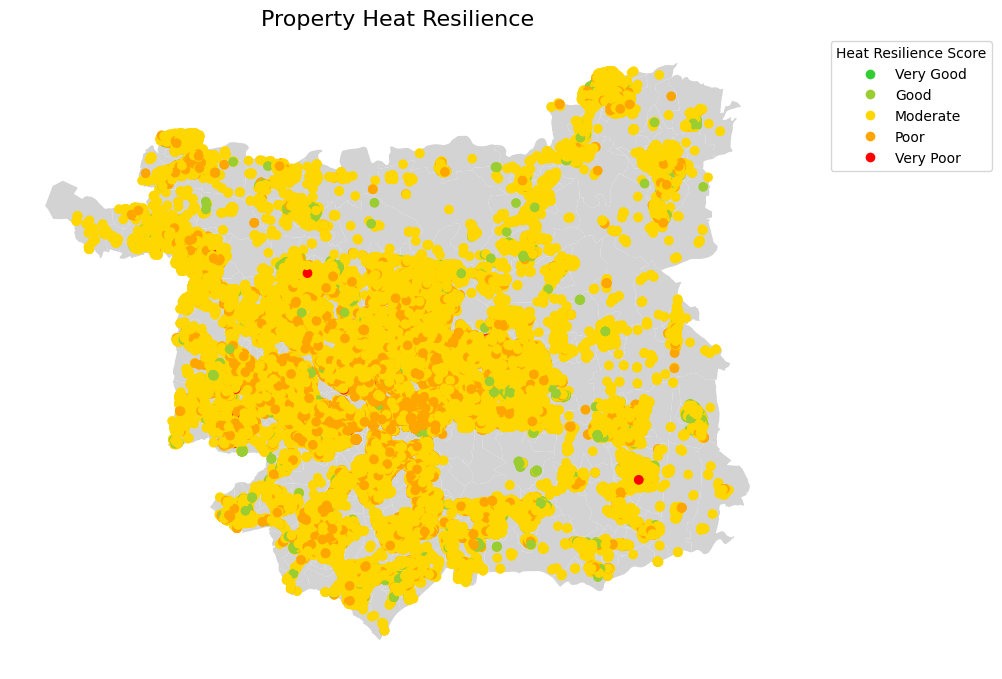

In [159]:
from matplotlib.lines import Line2D  # for legend handle

#Assign colors to each heat resilience type
heat_stress_colors = {
    'Very Good': 'limegreen',
    'Good': 'yellowgreen',
    'Moderate': 'gold',
    'Poor': 'orange',
    'Very Poor': 'red'}

#Plot Leeds map with colors based in the heat resilience type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')
Matrix_Final.plot(ax=ax, column='Heat_Resilience_Category',
               color=Matrix_Final['Heat_Resilience_Category'].map(heat_stress_colors),
               legend=True)
ax.set_title('Property Heat Resilience', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Heat Resilience Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [160]:
#custom_colors= ['limegreen','yellowgreen','gold','orange','red']
#sns.palplot(sns.color_palette(custom_colors))

Map the Environmental Heat Stress of Properties (to compare with map of heat resilience)

<ipython-input-161-b024b3107dc7>:14: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix_Final.plot(ax=ax, column='heat_stres',


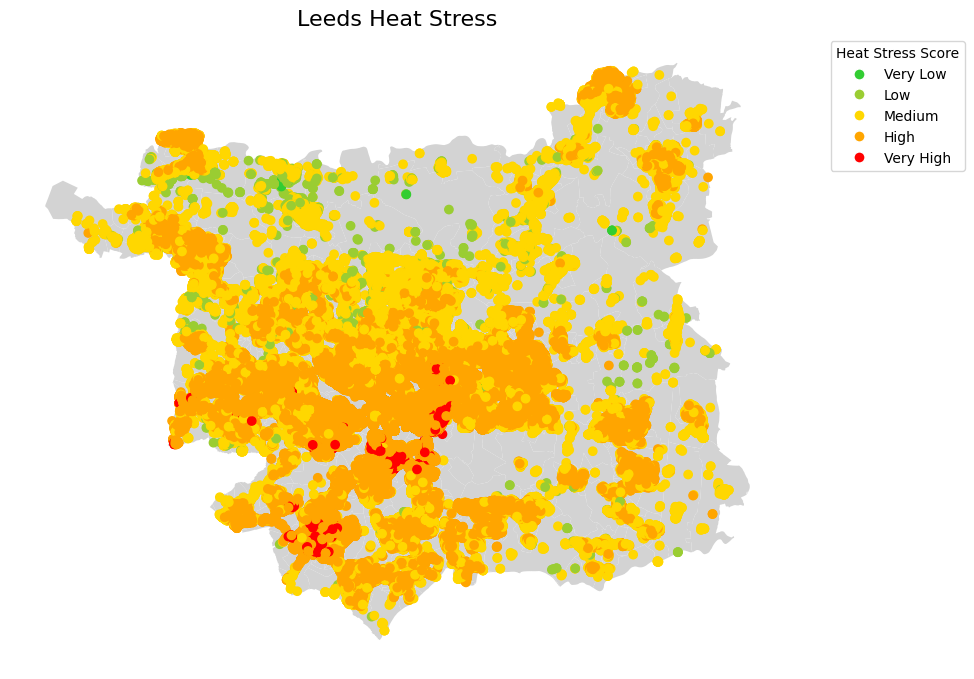

In [161]:
from matplotlib.lines import Line2D  # for legend handle

#Assign colors to each heat stress type
heat_stress_colors = {
    'Very Low': 'limegreen',
    'Low': 'yellowgreen',
    'Medium': 'gold',
    'High': 'orange',
    'Very High': 'red'}

#Plot Leeds map with colors based in the heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')
Matrix_Final.plot(ax=ax, column='heat_stres',
               color=Matrix_Final['heat_stres'].map(heat_stress_colors),
               legend=True)
ax.set_title('Leeds Heat Stress', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Heat Stress Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [162]:
Matrix_Final['Overall_Heat_Score'].describe()

count    357899.000000
mean          0.563661
std           0.087227
min           0.307586
25%           0.502894
50%           0.550689
75%           0.624205
max           0.868000
Name: Overall_Heat_Score, dtype: float64

In [163]:
Low_Resilience = Matrix_Final[['Heat_Resilience_Category', 'Index', 'geometry']]
DROP = ['Very Poor','Poor', 'Moderate']
Low_Resilience= Low_Resilience[~Low_Resilience['Heat_Resilience_Category'].isin(DROP)]
Low_Resilience.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3006 entries, 415 to 363913
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Heat_Resilience_Category  3006 non-null   category
 1   Index                     3006 non-null   int64   
 2   geometry                  3006 non-null   geometry
dtypes: category(1), geometry(1), int64(1)
memory usage: 73.6 KB


<ipython-input-164-9136df82f2a1>:14: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Matrix_Final.plot(ax=ax, column='heat_stres',
<ipython-input-164-9136df82f2a1>:17: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Low_Resilience.plot(ax=ax, column='Heat_Resilience_Category',


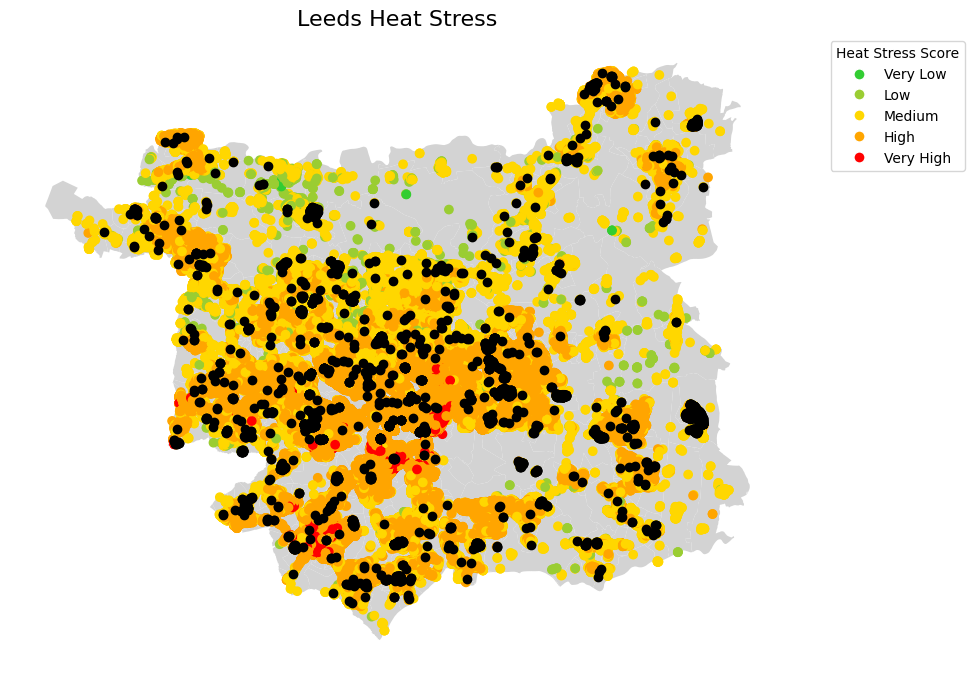

In [164]:
from matplotlib.lines import Line2D  # for legend handle

#Assign colors to each heat stress type
heat_stress_colors = {
    'Very Low': 'limegreen',
    'Low': 'yellowgreen',
    'Medium': 'gold',
    'High': 'orange',
    'Very High': 'red'}

#Plot Leeds map with colors based in the heat stress type
fig, ax = plt.subplots(figsize=(10, 10))
LeedsOA.plot(ax = ax, color = 'lightgray')
Matrix_Final.plot(ax=ax, column='heat_stres',
               color=Matrix_Final['heat_stres'].map(heat_stress_colors),
               legend=True)
Low_Resilience.plot(ax=ax, column='Heat_Resilience_Category',
               color='Black',
               legend=True)
ax.set_title('Leeds Heat Stress', fontsize=16)
ax.set_axis_off()

#Add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in heat_stress_colors.items()]
ax.legend(title='Heat Stress Score', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [165]:
import pandas as pd

# Save as CSV
Matrix_Final.to_csv("Matrix_Final4.csv", index=False)

In [166]:
import geopandas as gpd
import shutil

# Save Matrix_Final as an ESRI Shapefile
Matrix_Final.to_file("Matrix_Final4", driver="ESRI Shapefile")

# Compress all shapefile components into a ZIP file
shutil.make_archive("Matrix_Final4", "zip", "Matrix_Final4")


<ipython-input-166-0ade7f14b4e2>:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Matrix_Final.to_file("Matrix_Final4", driver="ESRI Shapefile")
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'PROPERTY_TYPE_WEIGHT' to 'PROPERTY_T'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'BUILT_FORM_WEIGHT' to 'BUILT_FORM'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'TOTAL_FLOOR_AREA_WEIGHT' to 'TOTAL_FLOO'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'FLAT_TOP_STOREY_WEIGHT' to 'FLAT_TOP_S'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'MULTI_GLAZE_PROPORTION_Score' to 'MULTI_GLA

'/content/Matrix_Final4.zip'

#Additional Considerations


#EPC Recommendations

In [167]:
EPCrecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   LMK_KEY                   1048575 non-null  object 
 1   IMPROVEMENT_ITEM          1048575 non-null  int64  
 2   IMPROVEMENT_SUMMARY_TEXT  933481 non-null   object 
 3   IMPROVEMENT_DESCR_TEXT    1048575 non-null  object 
 4   IMPROVEMENT_ID            932525 non-null   float64
 5   IMPROVEMENT_ID_TEXT       0 non-null        float64
 6   INDICATIVE_COST           826752 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 56.0+ MB


In [168]:
EPCrecom['INDICATIVE_COST'].isna().sum()

np.int64(221823)

In [169]:
EPCrecom = EPCrecom.dropna(subset=['INDICATIVE_COST'])

In [170]:
EPCrecom['INDICATIVE_COST'] = EPCrecom['INDICATIVE_COST'].astype(str).str.replace(r'[^\d-]', '', regex=True)

In [171]:
EPCrecom[['LOWER_COST', 'UPPER_COST']] = EPCrecom['INDICATIVE_COST'].astype(str).str.split('-', n=1, expand=True)
EPCrecom[['LOWER_COST', 'UPPER_COST']] = EPCrecom[['LOWER_COST', 'UPPER_COST']].apply(lambda x: x.str.strip().replace('', np.nan).astype(float))

In [172]:
EPCrecom['INDICATIVE_COST'] = EPCrecom[['LOWER_COST', 'UPPER_COST']].mean(axis=1)

In [173]:
EPCrecom.head()

LMK_KEY  IMPROVEMENT_ITEM  \
0  001dca82162cbdf798f746f53027c0cc82afda971d5e84...                 1   
1  001dca82162cbdf798f746f53027c0cc82afda971d5e84...                 2   
2  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...                 1   
3  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...                 2   
4  18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...                 3   

               IMPROVEMENT_SUMMARY_TEXT                IMPROVEMENT_DESCR_TEXT  \
0  Internal or external wall insulation  Internal or external wall insulation   
1   High heat retention storage heaters   High heat retention storage heaters   
2               Room-in-roof insulation               Room-in-roof insulation   
3  Internal or external wall insulation  Internal or external wall insulation   
4    Solar photovoltaic panels, 2.5 kWp             Solar photovoltaic panels   

   IMPROVEMENT_ID  IMPROVEMENT_ID_TEXT  INDICATIVE_COST  LOWER_COST  \
0             7.0                  NaN           9000.0      4000.0   
1            62.0                  NaN           1500.0      1200.0   
2            46.0                  NaN           2100.0      1500.0   
3             7.0                  NaN           9000.0      4000.0   
4            34.0                  NaN           4500.0      3500.0   

   UPPER_COST  
0     14000.0  
1      1800.0  
2      2700.0  
3     14000.0  
4      5500.0

In [174]:
heat_stress_improvements = {'Cavity wall insulation', 'Draught proofing', 'Flat roof or sloping ceiling insulation', 'Floor insulation',
                            'Floor insulation (solid floor)', 'Floor insulation (suspended floor)',
                            'Internal or external wall insulation', 'Party wall insulation',
                            'Replace single glazed windows with low-E double glazed windows', 'Replacement glazing units', 'Room-in-roof insulation',
                            'Secondary glazing to single glazed windows'}

In [175]:
EPCrecom = EPCrecom[EPCrecom['IMPROVEMENT_SUMMARY_TEXT'].isin(heat_stress_improvements)]

In [176]:
EPCrecom.head()

LMK_KEY  IMPROVEMENT_ITEM  \
0   001dca82162cbdf798f746f53027c0cc82afda971d5e84...                 1   
2   18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...                 1   
3   18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...                 2   
7   18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...                 1   
11                  275687798052018050310193492080467                 2   

                IMPROVEMENT_SUMMARY_TEXT  \
0   Internal or external wall insulation   
2                Room-in-roof insulation   
3   Internal or external wall insulation   
7     Floor insulation (suspended floor)   
11    Floor insulation (suspended floor)   

                  IMPROVEMENT_DESCR_TEXT  IMPROVEMENT_ID  IMPROVEMENT_ID_TEXT  \
0   Internal or external wall insulation             7.0                  NaN   
2                Room-in-roof insulation            46.0                  NaN   
3   Internal or external wall insulation             7.0                  NaN   
7     Floor insulation (suspended floor)            57.0                  NaN   
11    Floor insulation (suspended floor)            57.0                  NaN   

    INDICATIVE_COST  LOWER_COST  UPPER_COST  
0            9000.0      4000.0     14000.0  
2            2100.0      1500.0      2700.0  
3            9000.0      4000.0     14000.0  
7            1000.0       800.0      1200.0  
11           1000.0       800.0      1200.0

In [177]:
EPCrecom['IMPROVEMENT_SUMMARY_TEXT'].nunique()

12

In [178]:
improvement_mean_cost = EPCrecom.groupby('IMPROVEMENT_SUMMARY_TEXT')['INDICATIVE_COST'].mean()

print(improvement_mean_cost)

IMPROVEMENT_SUMMARY_TEXT
Cavity wall insulation                                             940.450385
Draught proofing                                                   100.000000
Flat roof or sloping ceiling insulation                           1175.000000
Floor insulation                                                  1000.000000
Floor insulation (solid floor)                                    5000.000000
Floor insulation (suspended floor)                                1000.090516
Internal or external wall insulation                              9068.765567
Party wall insulation                                              450.000000
Replace single glazed windows with low-E double glazed windows    4854.237463
Replacement glazing units                                         1200.000000
Room-in-roof insulation                                           2100.000000
Secondary glazing to single glazed windows                        1250.000000
Name: INDICATIVE_COST, dtype: float64


# Improved matrix

In [179]:
import ipywidgets as widgets
from IPython.display import display

# Weightings for each variable
weights = {
    "Property Type": 0.25,
    "Building Form": 0.04,
    "Top Storey": 0.15,
    "Construction Age": 0.04,
    "Total Floor Area":  0.25,
    "Flooring": 0.04,
    "Proportion of Double Glazed": 0.04,
    "Glazing Type": 0.04,
    "Walls": 0.1,
    "Roof": 0.05
}
# Property type scoring
property_type_scores = {
    "House": 0.6,
    "Flat": 0.9,
    "Bungalow": 0.5,
    "Maisonette": 0.4,
    "Park home": 0.1
}

# Building form scoring
building_form_scores = {
    "Semi-detached": 0.6,
    "Mid-Terrace": 0.8,
    "Detached": 0.2,
    "End-Terrace": 0.3,
    "Enclosed Mid-Terrace": 0.7,
    "Enclosed End-Terrace": 0.4
}

# Total Floor Area scoring
floor_area_scores = {
    "Above 92m2": 0.4,
    "73-92m2 ": 0.6,
    "58-73m2": 0.8,
    "Below 28m2": 1
}

# Top Storey scoring
top_storey_scores = {
    "No": 0.1,
    "Yes": 0.9
}

# Construction age scoring
construction_age_scores = {
    "2011 onwards": 0.2,
    "2004-2010": 0.4,
    "1985-2003": 0.6,
    "1966-1964": 0.8,
    "Pre-1965": 1
}


# Category scoring
category_scores = {
    "Very Good": 0.2,
    "Good": 0.4,
    "Moderate": 0.6,
    "Poor": 0.8,
    "Very Poor": 1
}

# Dropdown widgets for each variable
property_type_dropdown = widgets.Dropdown(
    options=property_type_scores.keys(),
    value='House',
    description='Property Type:',
    disabled=False,
)

building_form_dropdown = widgets.Dropdown(
    options=building_form_scores.keys(),
    value='Semi-detached',
    description='Building Form:',
    disabled=False,
)

floor_area_dropdown = widgets.Dropdown(
    options=floor_area_scores.keys(),
    value='58-73m2',
    description='Total Floor Area:',
    disabled=False,
)

top_storey_dropdown= widgets.Dropdown(
    options=top_storey_scores.keys(),
    value='Yes',
    description='Top Storey:',
    disabled=False,
)

construction_age_dropdown= widgets.Dropdown(
    options=construction_age_scores.keys(),
    value='Pre-1965',
    description='Construction Age:',
    disabled=False,
)



flooring_dropdown = widgets.Dropdown(
    options=category_scores.keys(),
    value='Moderate',
    description='Flooring:',
    disabled=False,
)

proportion_dropdown = widgets.Dropdown(
    options=category_scores.keys(),
    value='Moderate',
    description='Proportion of Double Glazed:',
    disabled=False,
)

glaze_type_dropdown = widgets.Dropdown(
    options=category_scores.keys(),
    value='Moderate',
    description='Glazing Type:',
    disabled=False,
)

walls_dropdown = widgets.Dropdown(
    options=category_scores.keys(),
    value='Moderate',
    description='Walls:',
    disabled=False,
)

roof_dropdown = widgets.Dropdown(
    options=category_scores.keys(),
    value='Moderate',
    description='Roof:',
    disabled=False,
)

# Output label
result_label = widgets.Label(value="Final Heat Stress Score: ")

# Function to calculate final score and assign a category
def calculate_score(property, building, area, storey, age, flooring, proportion, glaze_type, walls, roof):
    total_score = (
        property_type_scores[property]* weights["Property Type"] +
        building_form_scores[building]* weights["Building Form"] +
        floor_area_scores[area]* weights["Top Storey"] +
        top_storey_scores[storey]* weights["Construction Age"] +
        construction_age_scores[age]* weights["Total Floor Area"] +
        category_scores[flooring] * weights["Flooring"] +
        category_scores[proportion] * weights["Proportion of Double Glazed"] +
        category_scores[glaze_type] * weights["Glazing Type"] +
        category_scores[walls] * weights["Walls"] +
        category_scores[roof] * weights["Roof"]
    )

    # Assign category from thresholds
    if total_score <= 0.2:
        category = "Very Good"
    elif total_score <= 0.4:
        category = "Good"
    elif total_score <= 0.6:
        category = "Moderate"
    elif total_score <= 0.8:
        category = "Poor"
    else:
        category = "Very Poor"

    result_label.value = f"Final Heat Resilience Score: {total_score:.2f}, Category: {category}"
    return result_label  # Ensures the output updates in the interactive widget

# Create interactive widget
interactive_widget = widgets.interactive_output(
    calculate_score,
    {
        'property': property_type_dropdown,
        'building':building_form_dropdown,
        'area': floor_area_dropdown,
        'storey': top_storey_dropdown,
        'age': construction_age_dropdown,
        'flooring': flooring_dropdown,
        'proportion': proportion_dropdown,
        'glaze_type': glaze_type_dropdown,
        'walls': walls_dropdown,
        'roof': roof_dropdown
    }
)

# Display dropdowns and result label
display(property_type_dropdown, building_form_dropdown, floor_area_dropdown, top_storey_dropdown, construction_age_dropdown, flooring_dropdown, proportion_dropdown, glaze_type_dropdown, walls_dropdown, roof_dropdown, interactive_widget, result_label)


Dropdown(description='Property Type:', options=('House', 'Flat', 'Bungalow', 'Maisonette', 'Park home'), value…

Dropdown(description='Building Form:', options=('Semi-detached', 'Mid-Terrace', 'Detached', 'End-Terrace', 'En…

Dropdown(description='Total Floor Area:', index=2, options=('Above 92m2', '73-92m2 ', '58-73m2', 'Below 28m2')…

Dropdown(description='Top Storey:', index=1, options=('No', 'Yes'), value='Yes')

Dropdown(description='Construction Age:', index=4, options=('2011 onwards', '2004-2010', '1985-2003', '1966-19…

Dropdown(description='Flooring:', index=2, options=('Very Good', 'Good', 'Moderate', 'Poor', 'Very Poor'), val…

Dropdown(description='Proportion of Double Glazed:', index=2, options=('Very Good', 'Good', 'Moderate', 'Poor'…

Dropdown(description='Glazing Type:', index=2, options=('Very Good', 'Good', 'Moderate', 'Poor', 'Very Poor'),…

Dropdown(description='Walls:', index=2, options=('Very Good', 'Good', 'Moderate', 'Poor', 'Very Poor'), value=…

Dropdown(description='Roof:', index=2, options=('Very Good', 'Good', 'Moderate', 'Poor', 'Very Poor'), value='…

Output()

Label(value='Final Heat Resilience Score: 0.74, Category: Poor')